In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_frames = []
for file in os.listdir('/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves'):
    data_frames.append(pd.read_csv(os.path.join('/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves', file), header=1))


In [3]:
path_ac = "/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves"
a1 =pd.read_csv(os.path.join(path_ac, "auction_aggregated_curves_germany_luxembourg_20220506.csv"),header=1)
a2 = pd.read_csv(os.path.join(path_ac, "auction_aggregated_curves_germany_luxembourg_20220101.csv"),header=1)
a3= pd.read_csv(os.path.join(path_ac, "auction_aggregated_curves_germany_luxembourg_20220221.csv"),header=1)

In [4]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18617 entries, 0 to 18616
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           18617 non-null  object 
 1   Week           18617 non-null  int64  
 2   Week Day       18617 non-null  int64  
 3   Hour           18617 non-null  int64  
 4   Price          18617 non-null  float64
 5   Volume         18617 non-null  float64
 6   Sale/Purchase  18617 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 1018.2+ KB


In [5]:
df = pd.DataFrame(a1)
df_first_h = df[(df['Hour'] == 1)]
c =df_first_h[df_first_h['Sale/Purchase'] == 'Sell'].count()['Date']
print("The numbers of sells in the first hour:", c)
c =df_first_h[df_first_h['Sale/Purchase'] == 'Purchase'].count()['Date']
print("The numbers of purchases in the first hour:", c)

The numbers of sells in the first hour: 303
The numbers of purchases in the first hour: 454


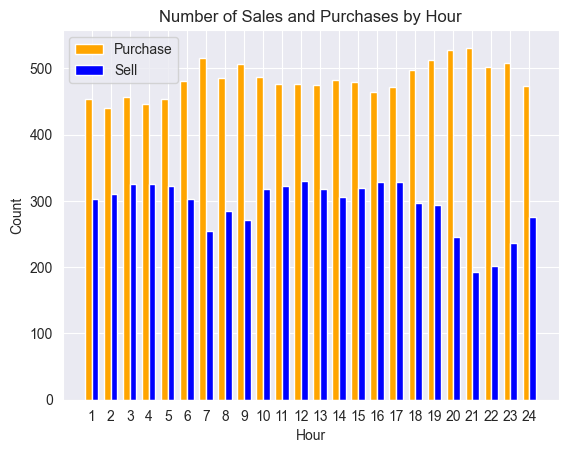

In [6]:
hourly_counts = df.groupby(['Hour', 'Sale/Purchase']).size().unstack(fill_value=0)

# Get unique hours
hours = np.sort(df['Hour'].unique())

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(hours))
r2 = [x + bar_width for x in r1]

# Plotting
plt.bar(r1, hourly_counts['Purchase'], color='orange', width=bar_width, label='Purchase')
plt.bar(r2, hourly_counts['Sell'], color='blue', width=bar_width, label='Sell')

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Number of Sales and Purchases by Hour')
plt.xticks([r + bar_width/2 for r in range(len(hours))], hours)
plt.legend()
plt.show()

In [7]:
for df in data_frames:
   df['Date']= pd.to_datetime(df['Date'],format='%d/%m/%Y')
data_frames_sorted = sorted(data_frames, key=lambda x: x['Date'].min())


/Users/tarekchaouch/PycharmProjects/electricityMarket/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


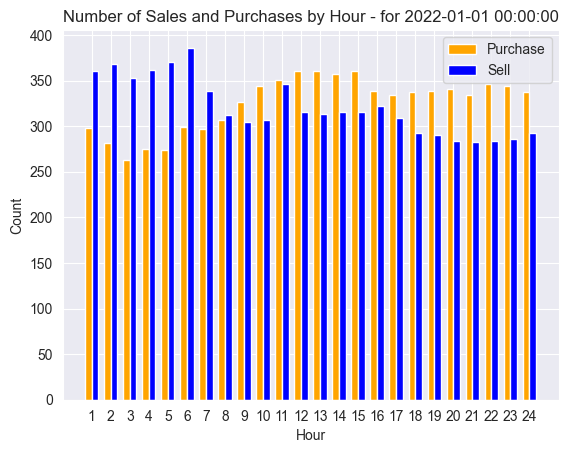

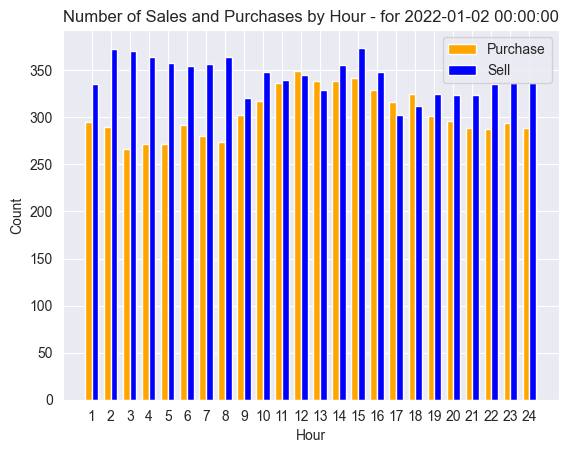

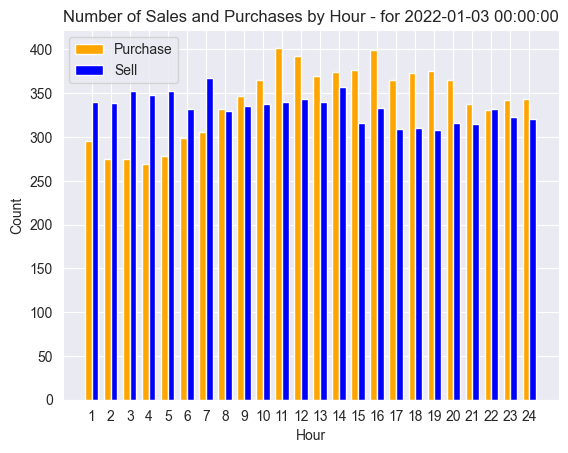

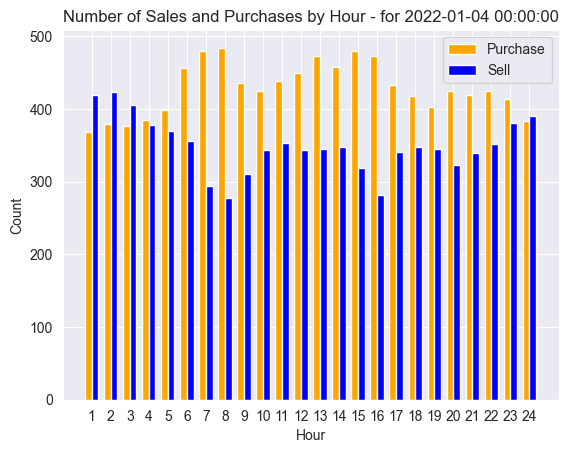

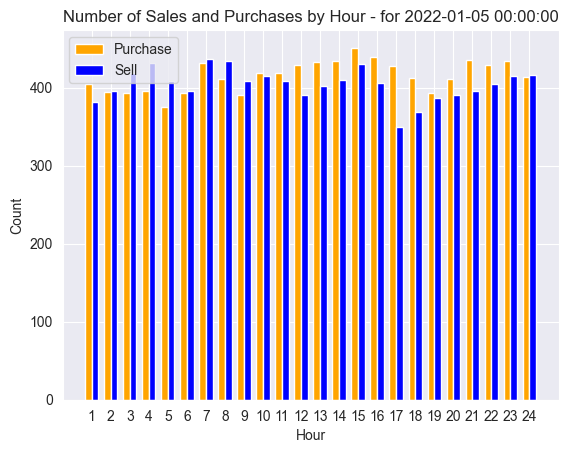

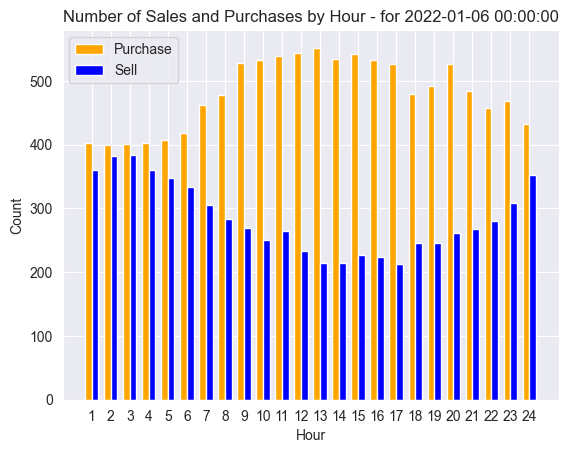

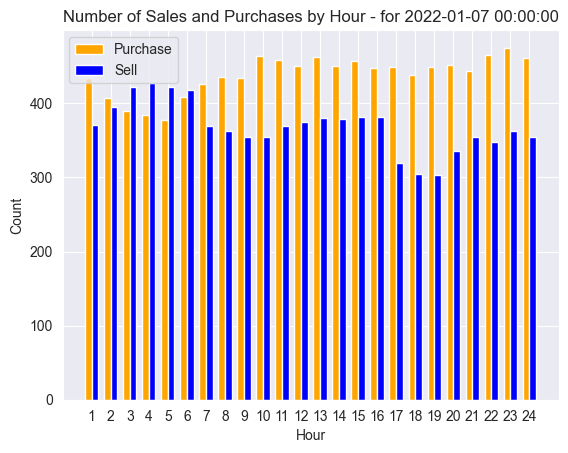

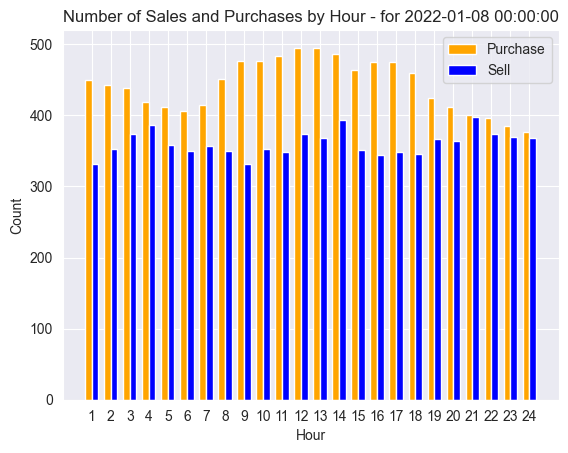

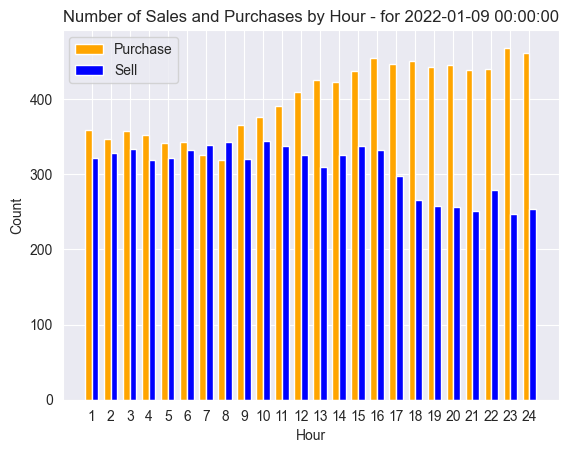

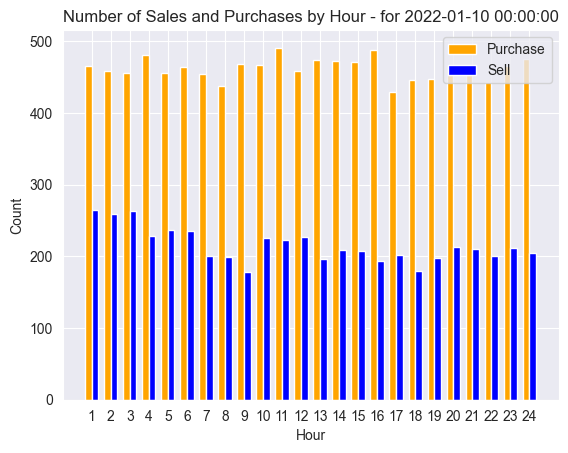

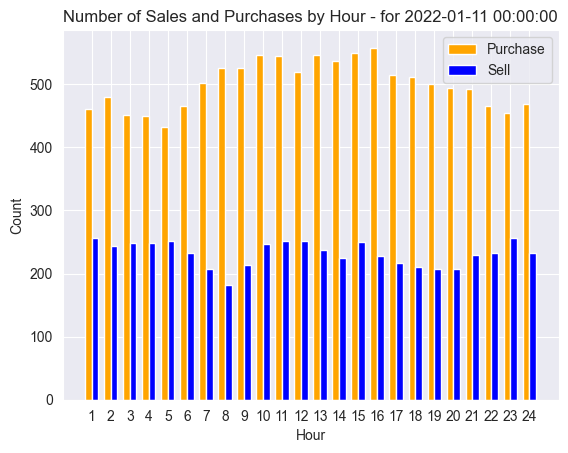

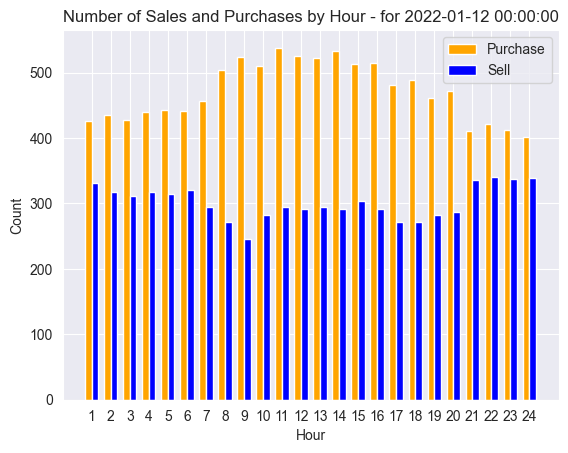

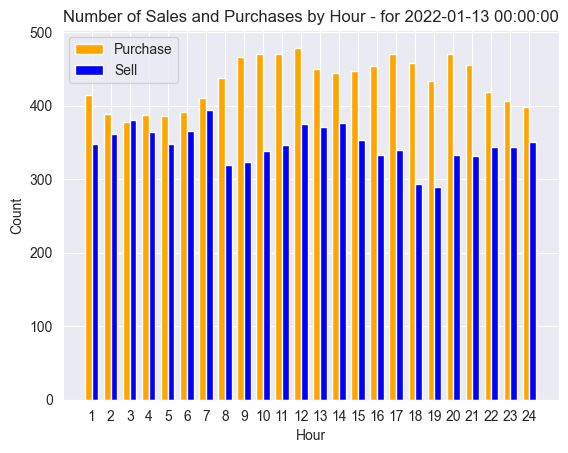

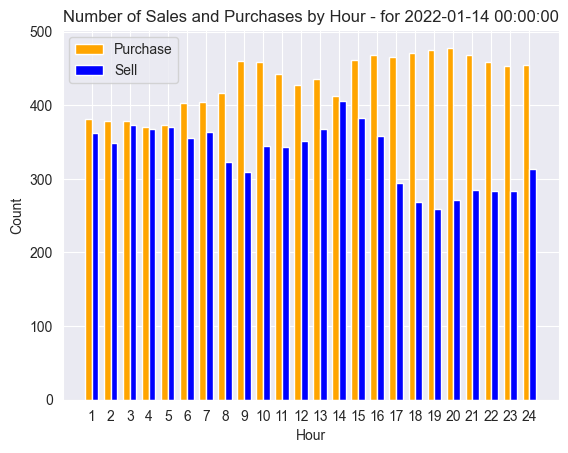

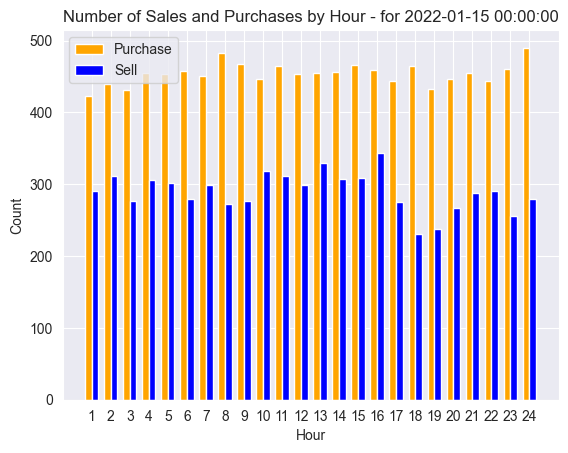

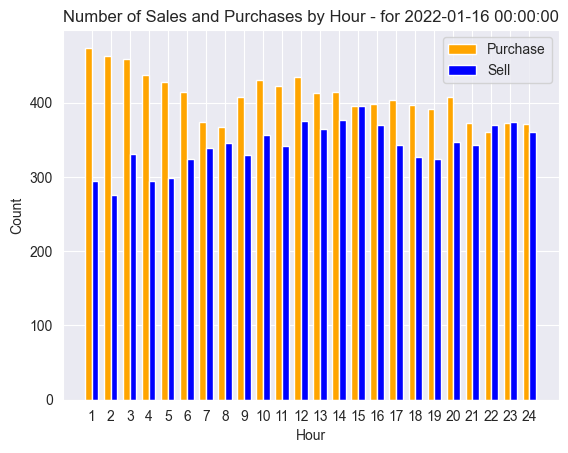

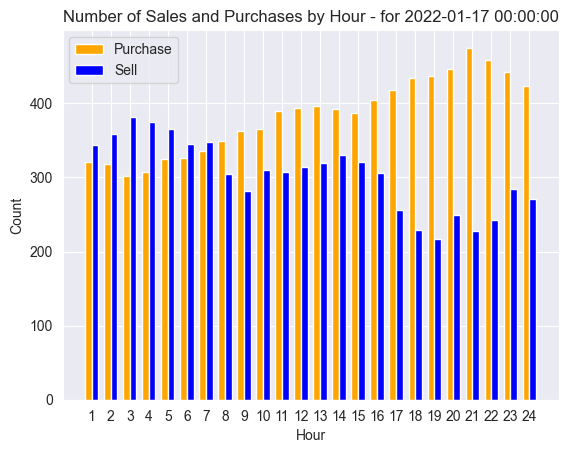

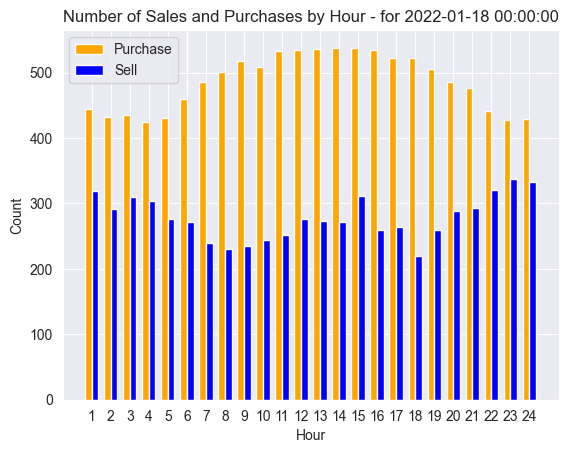

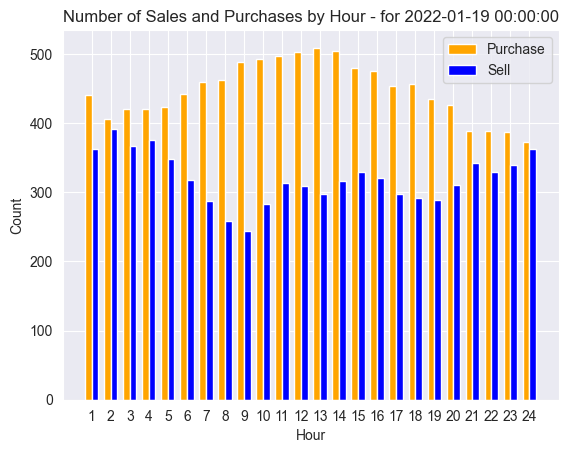

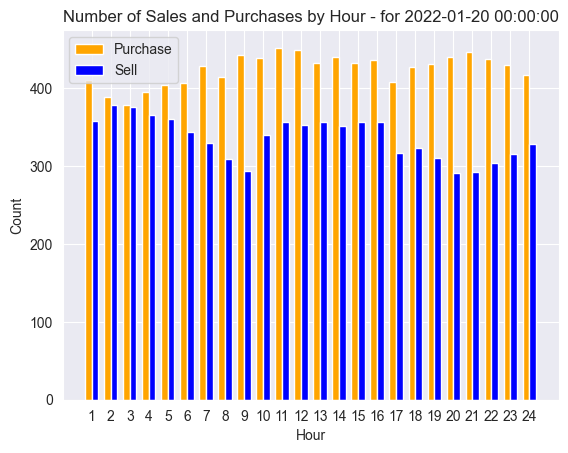

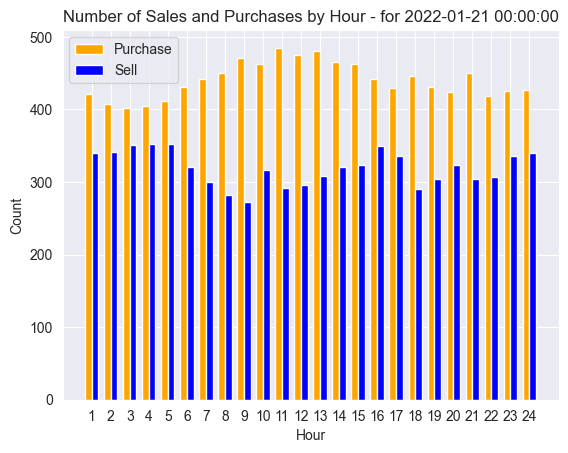

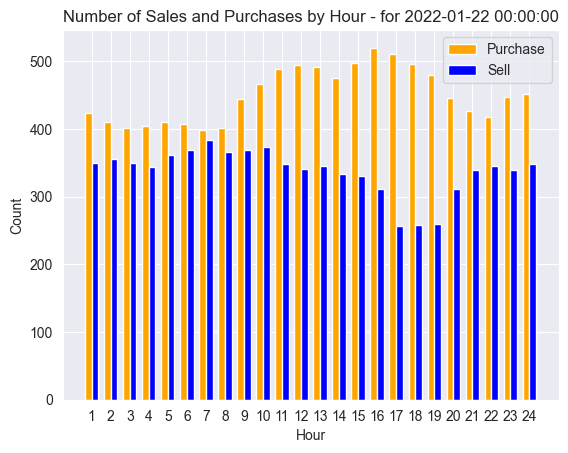

KeyboardInterrupt: 

In [8]:
# Plotting for each DataFrame
for i, df in enumerate(data_frames_sorted, start=1):
    # Grouping by 'Hour' and 'Sale/Purchase' and getting counts
    hourly_counts = df.groupby(['Hour', 'Sale/Purchase']).size().unstack(fill_value=0)

    # Get unique hours
    hours = np.sort(df['Hour'].unique())

    # Set the width of the bars
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    r1 = np.arange(len(hours))
    r2 = [x + bar_width for x in r1]

    # Plotting
    plt.figure()
    plt.bar(r1, hourly_counts['Purchase'], color='orange', width=bar_width, label='Purchase')
    plt.bar(r2, hourly_counts['Sell'], color='blue', width=bar_width, label='Sell')

    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.title(f'Number of Sales and Purchases by Hour - for {str(df["Date"][0])}')
    plt.xticks([r + bar_width/2 for r in range(len(hours))], hours)
    plt.legend()

plt.show()

/Users/tarekchaouch/PycharmProjects/electricityMarket/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


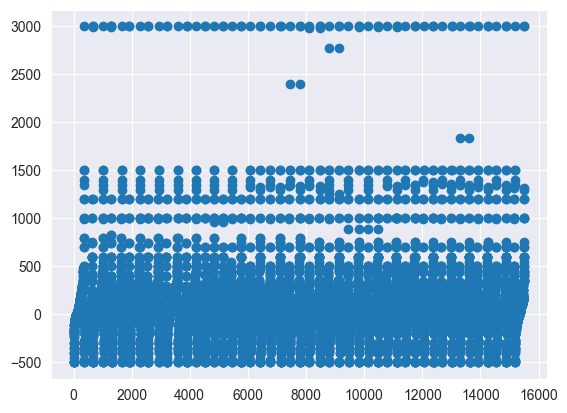

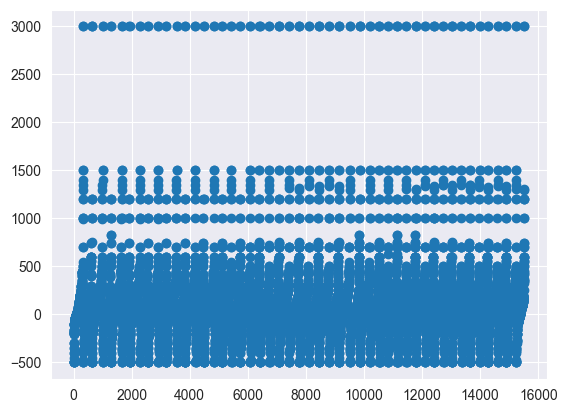

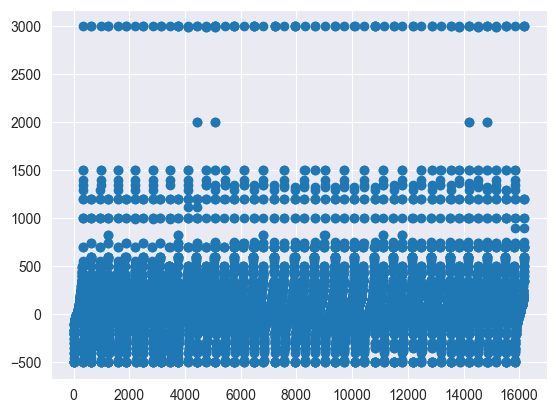

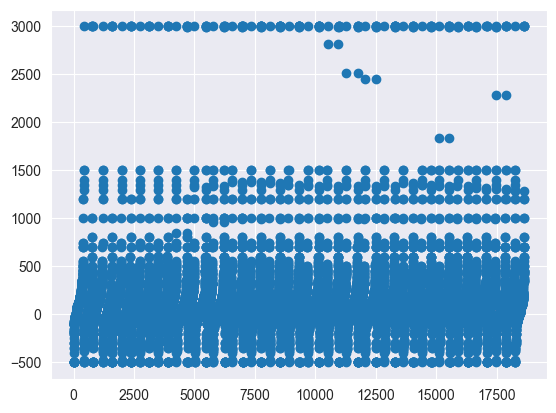

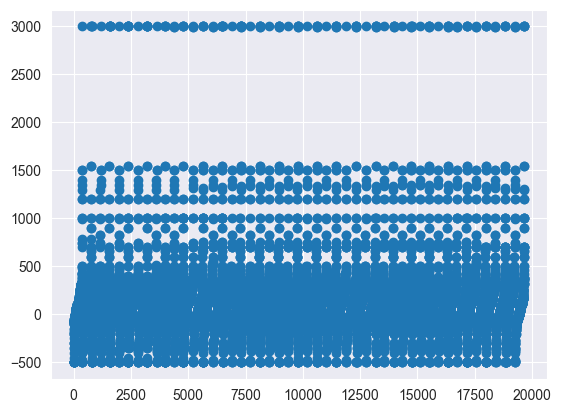

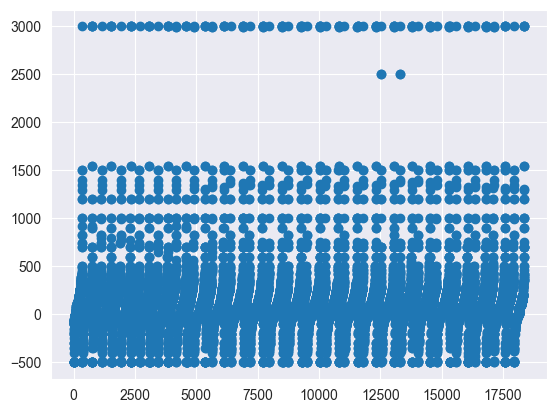

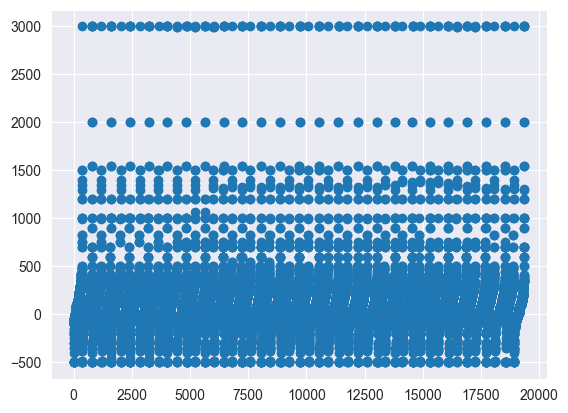

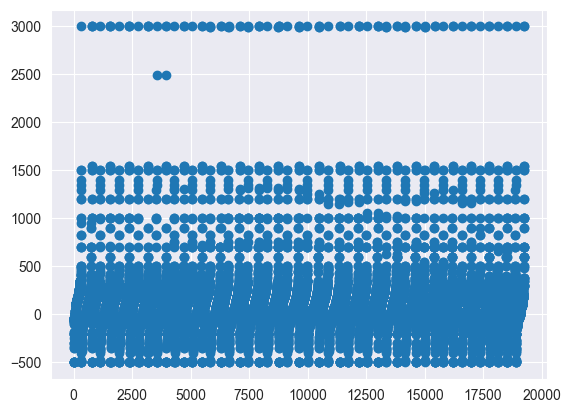

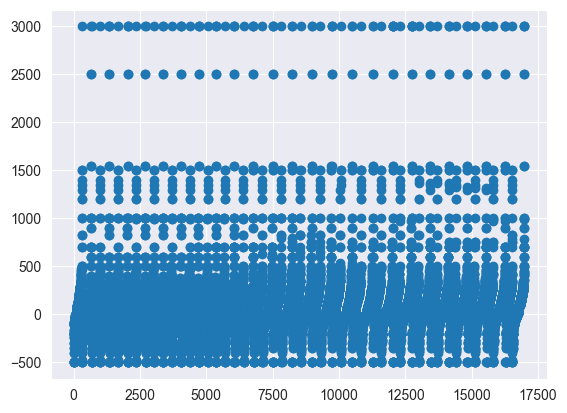

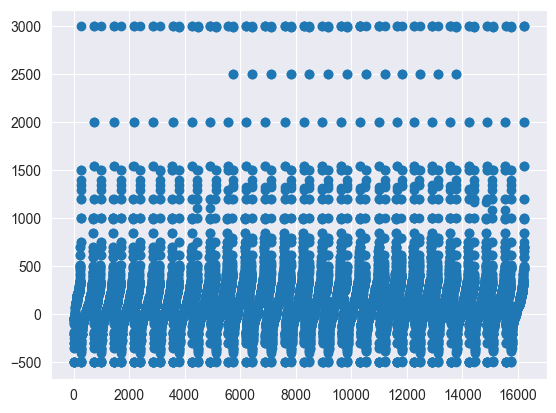

KeyboardInterrupt: 

In [9]:
#plot the price of each index
for df in data_frames_sorted:
    fig, ax = plt.subplots()
    ax.scatter(df.index,df["Price"])

plt.show()

In [10]:
df.head(20)

Date  Week  Week Day  Hour   Price   Volume Sale/Purchase
0  2022-05-06    18         5     1 -500.00   6602.1          Sell
1  2022-05-06    18         5     1 -500.00  12165.6          Sell
2  2022-05-06    18         5     1 -499.90  12165.6          Sell
3  2022-05-06    18         5     1 -499.90  12204.3          Sell
4  2022-05-06    18         5     1 -498.00  12204.3          Sell
5  2022-05-06    18         5     1 -497.90  12204.4          Sell
6  2022-05-06    18         5     1 -350.10  12204.6          Sell
7  2022-05-06    18         5     1 -350.00  12206.2          Sell
8  2022-05-06    18         5     1 -300.10  12206.3          Sell
9  2022-05-06    18         5     1 -300.00  12272.6          Sell
10 2022-05-06    18         5     1 -299.00  12343.5          Sell
11 2022-05-06    18         5     1 -275.00  12346.2          Sell
12 2022-05-06    18         5     1 -250.00  12346.2          Sell
13 2022-05-06    18         5     1 -200.00  12346.2          Sell
14 2022-05-06    18         5     1 -199.92  12464.7          Sell
15 2022-05-06    18         5     1 -199.90  12525.1          Sell
16 2022-05-06    18         5     1 -178.40  12525.1          Sell
17 2022-05-06    18         5     1 -178.30  12529.4          Sell
18 2022-05-06    18         5     1 -110.04  12529.4          Sell
19 2022-05-06    18         5     1 -110.00  12568.8          Sell

Correlation between Price and Volume: -0.10145973046772729


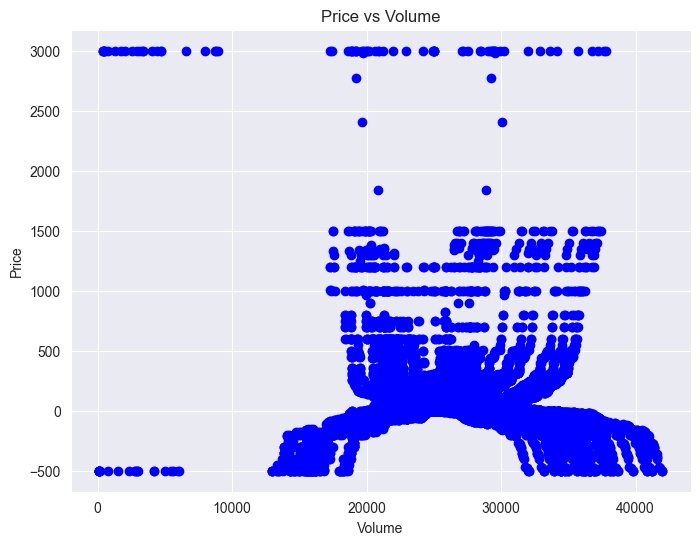

Correlation between Price and Volume: 0.023149482741502362


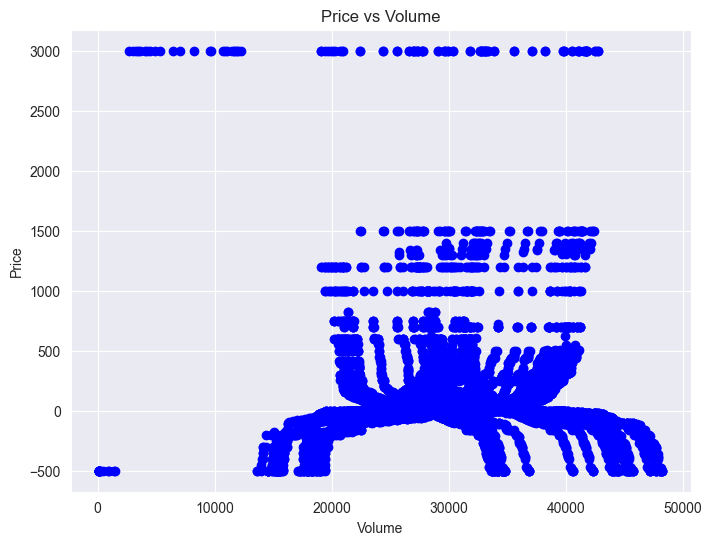

Correlation between Price and Volume: -0.040277598512744206


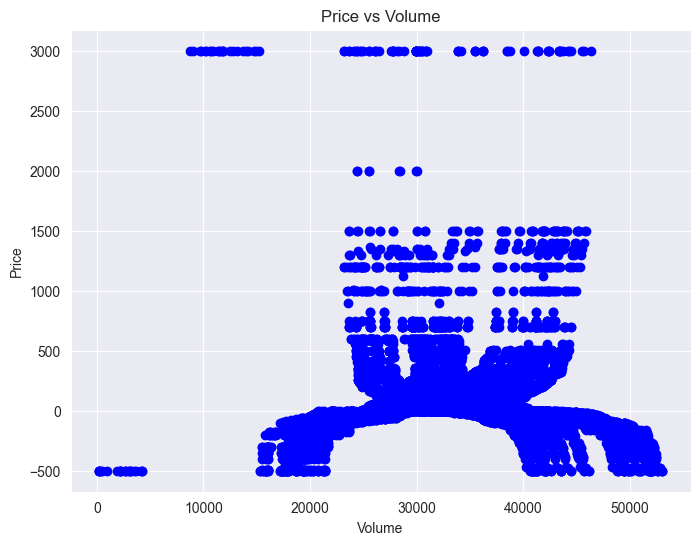

Correlation between Price and Volume: -0.18496875047174788


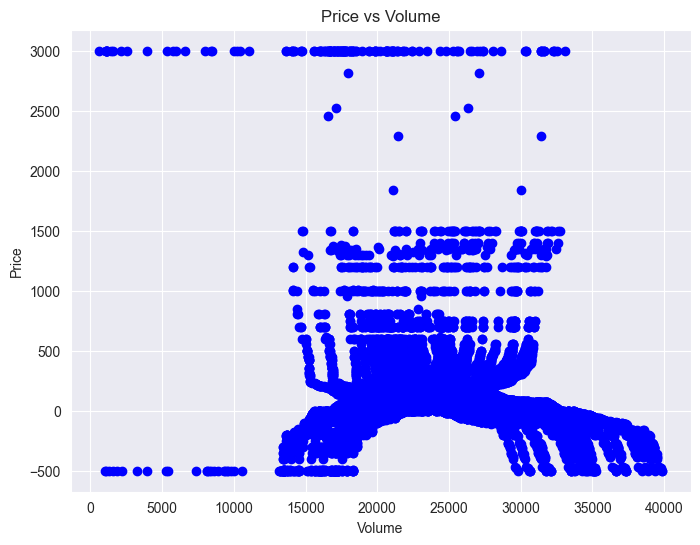

Correlation between Price and Volume: -0.08985191382359341


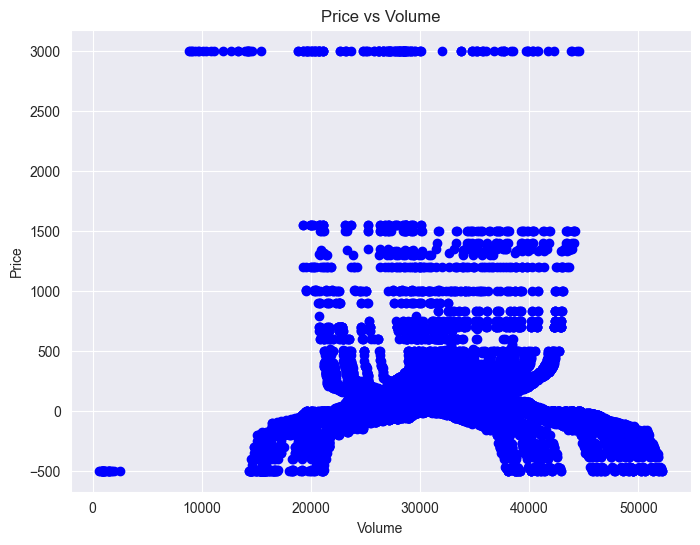

Correlation between Price and Volume: -0.3487192409004334


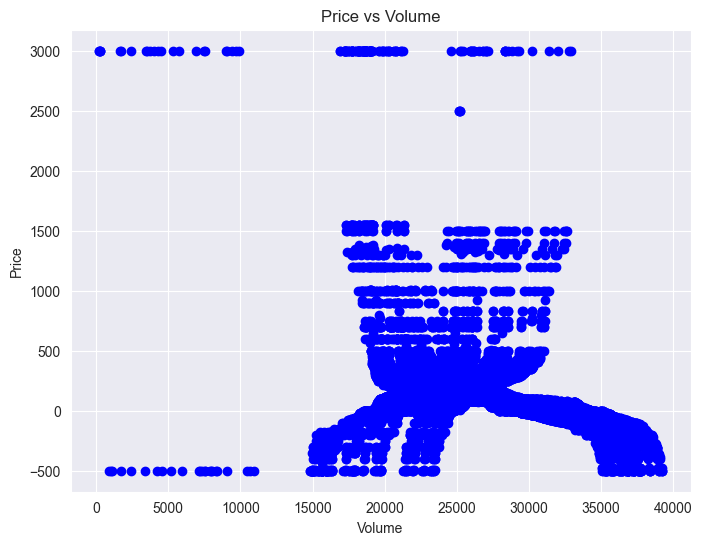

Correlation between Price and Volume: -0.14967820675440147


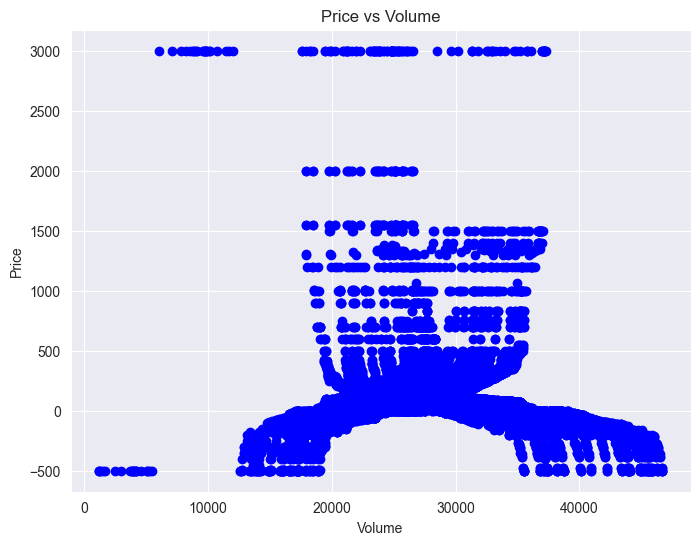

Correlation between Price and Volume: -0.20018137356047003


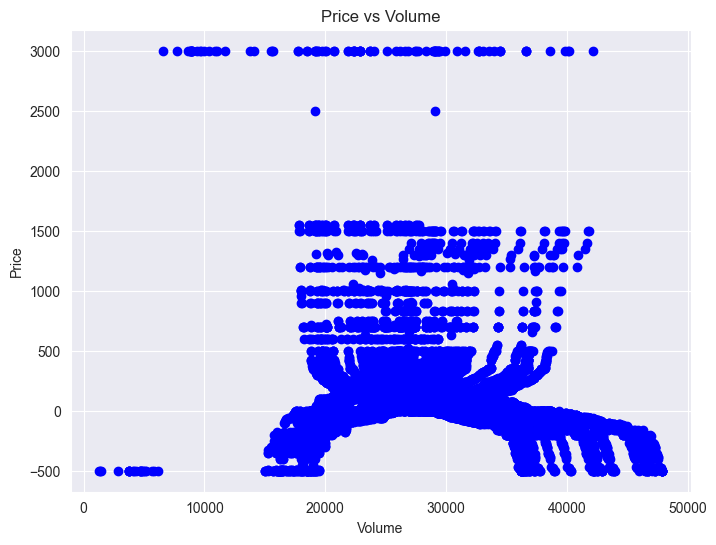

Correlation between Price and Volume: -0.20316252671188192


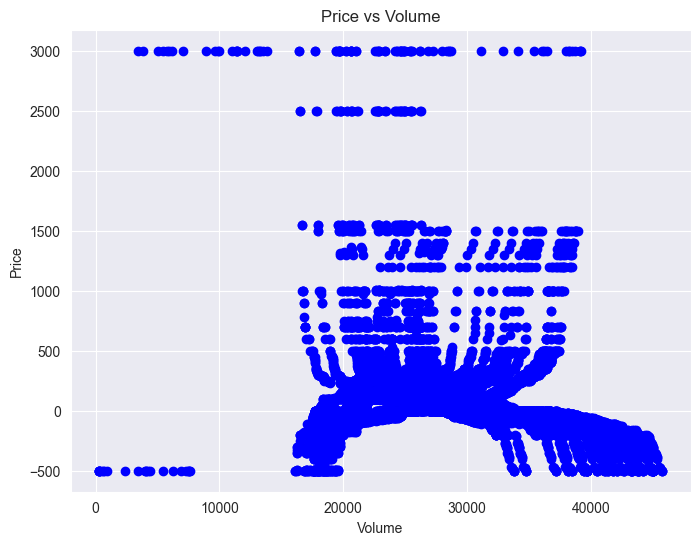

Correlation between Price and Volume: -0.2894254544179905


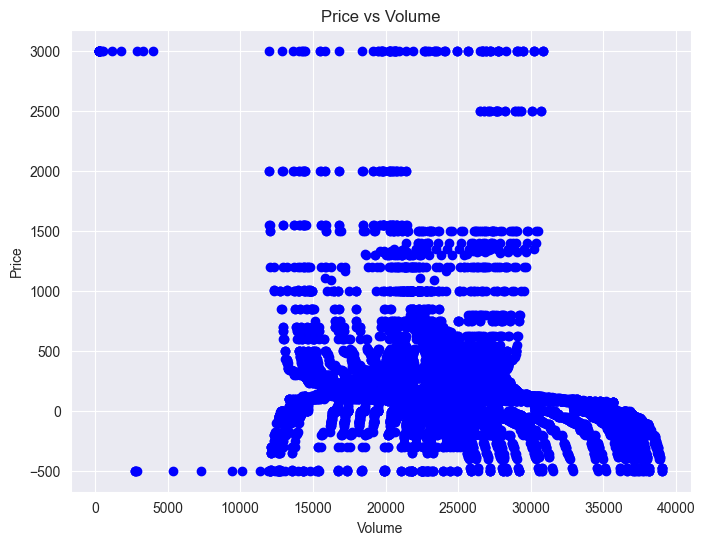

Correlation between Price and Volume: -0.363575113734565


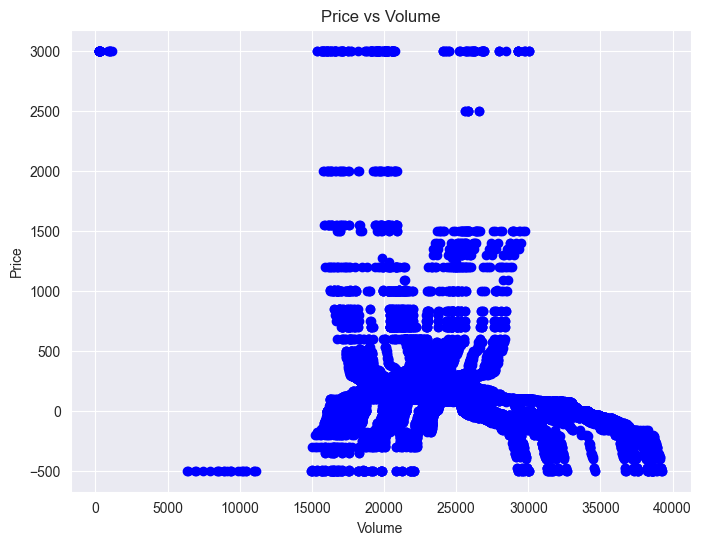

Correlation between Price and Volume: -0.2894535806046818


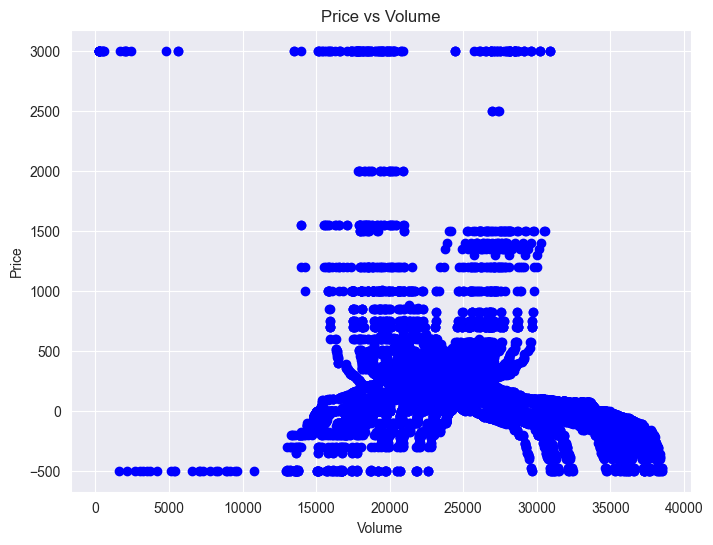

Correlation between Price and Volume: -0.19015605527362162


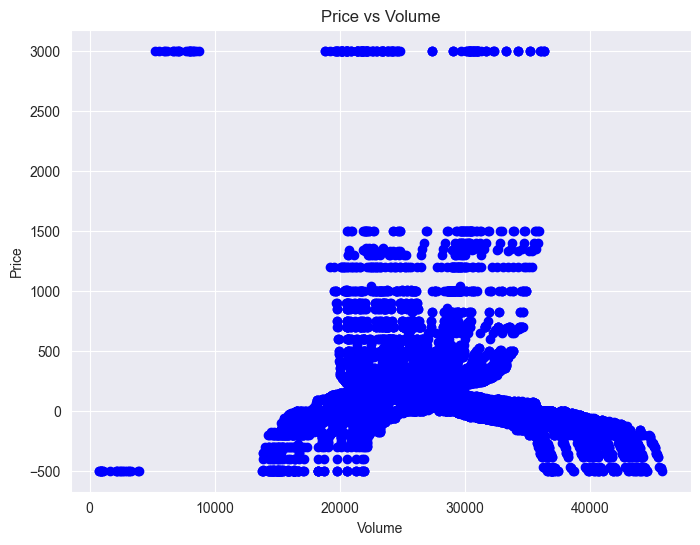

Correlation between Price and Volume: -0.2347446515184476


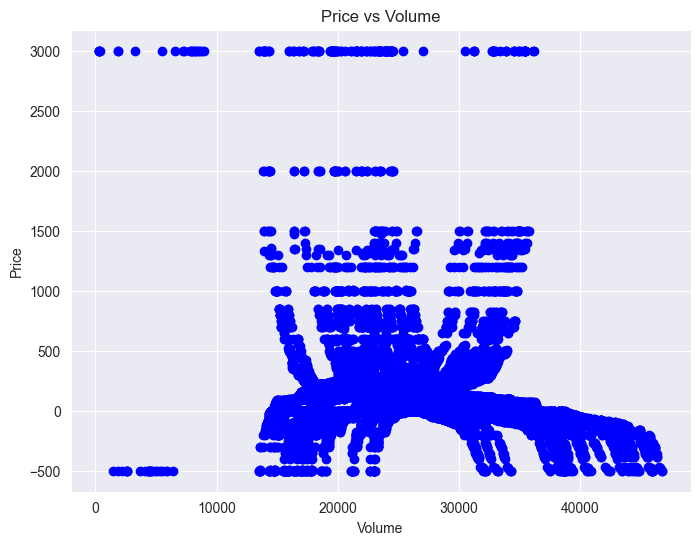

Correlation between Price and Volume: -0.2930548757219052


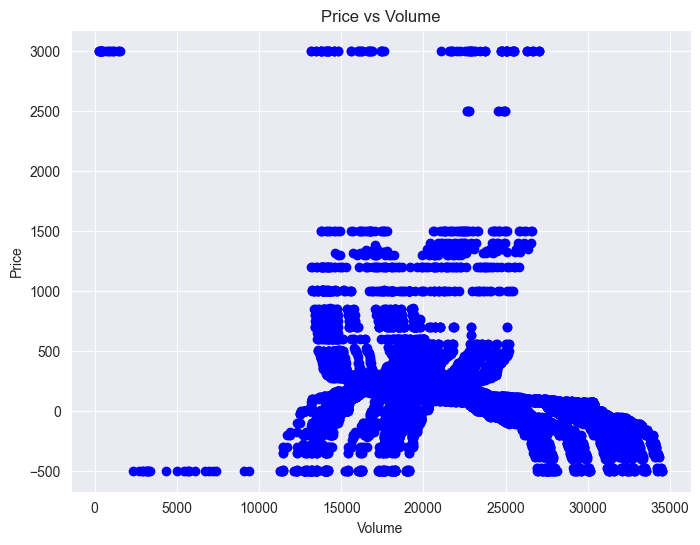

Correlation between Price and Volume: -0.15568779682433506


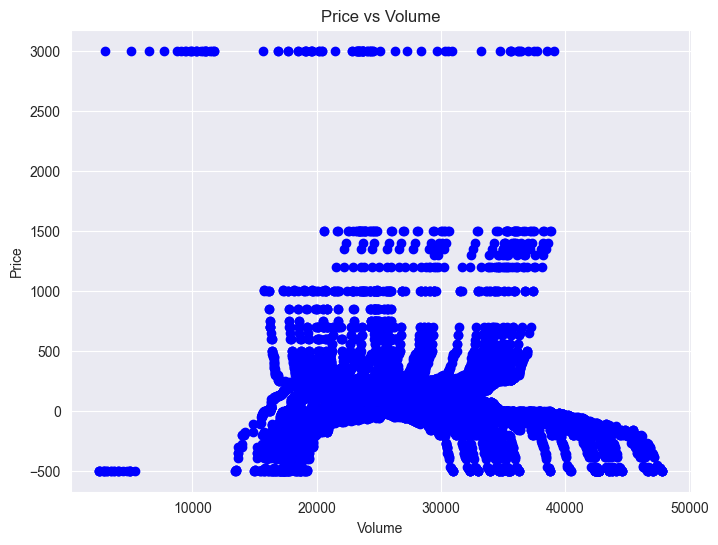

Correlation between Price and Volume: -0.16569680757581057


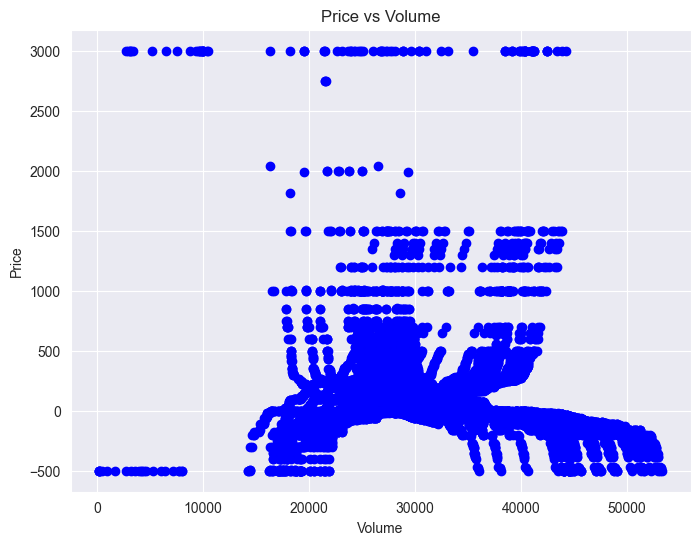

Correlation between Price and Volume: -0.30341672904610834


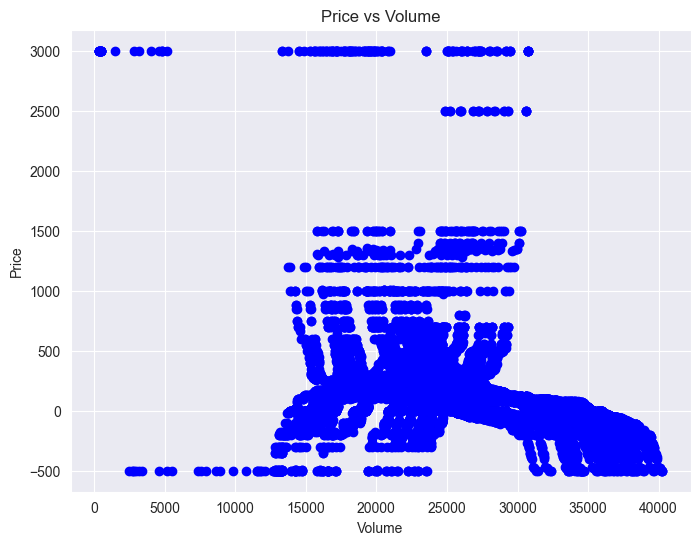

Correlation between Price and Volume: -0.24085235415177664


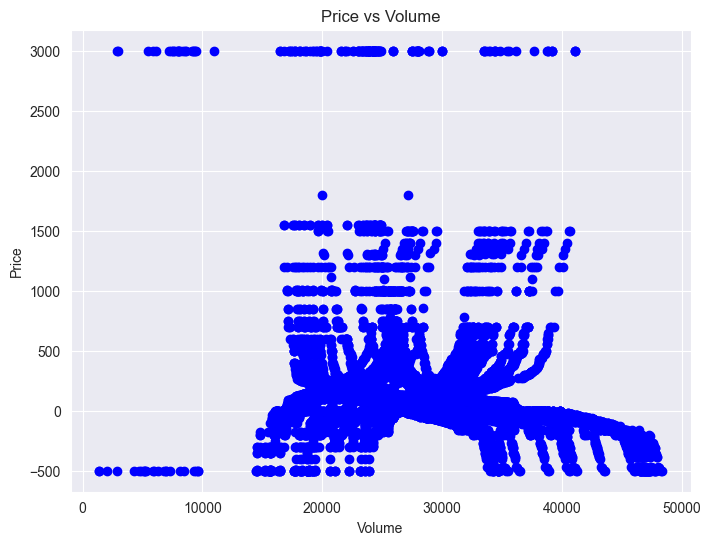

Correlation between Price and Volume: -0.18894638165292227


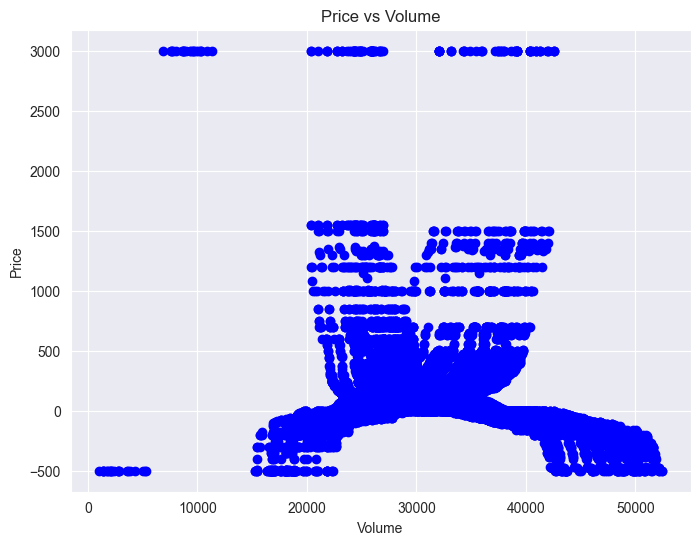

Correlation between Price and Volume: -0.20970143432587748


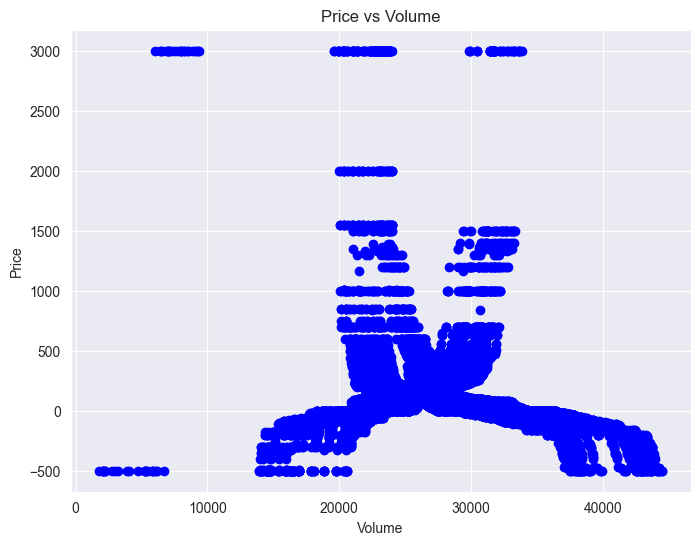

Correlation between Price and Volume: -0.2538933844901211


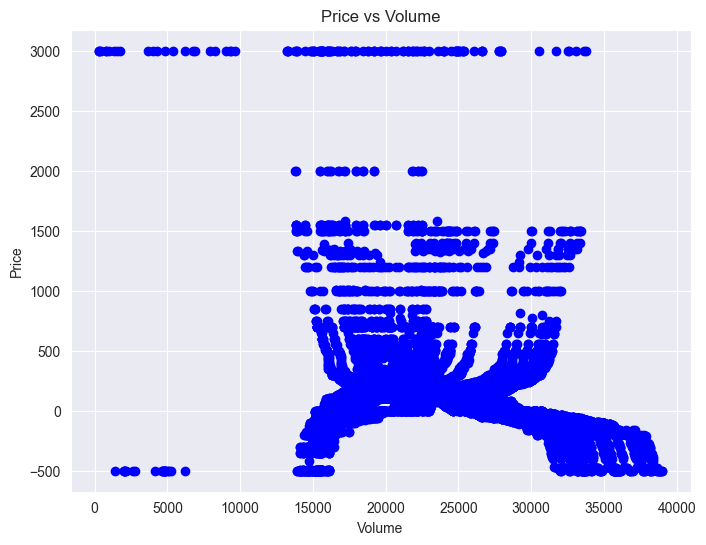

Correlation between Price and Volume: -0.31015777935490546


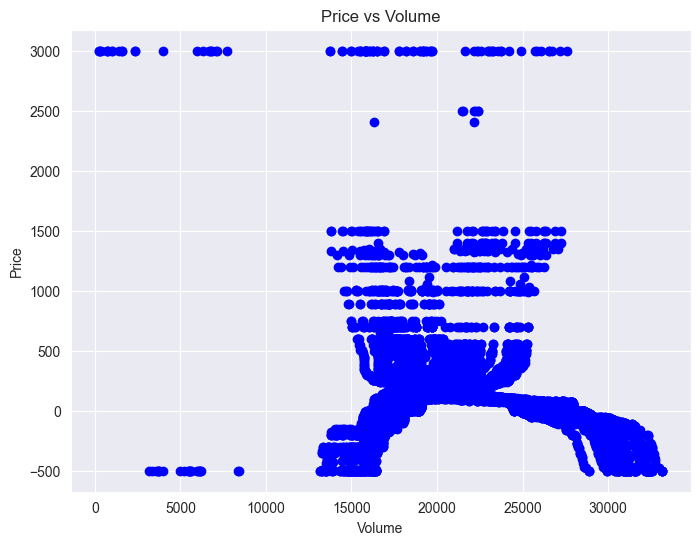

Correlation between Price and Volume: -0.2900630116347648


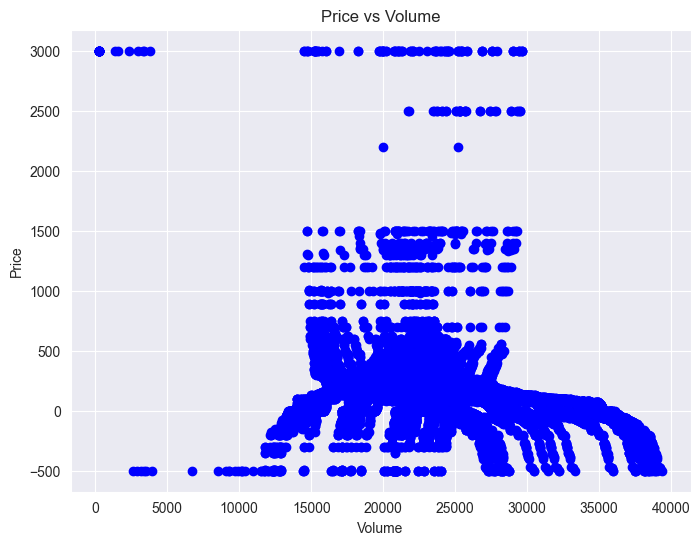

Correlation between Price and Volume: -0.28248095883966634


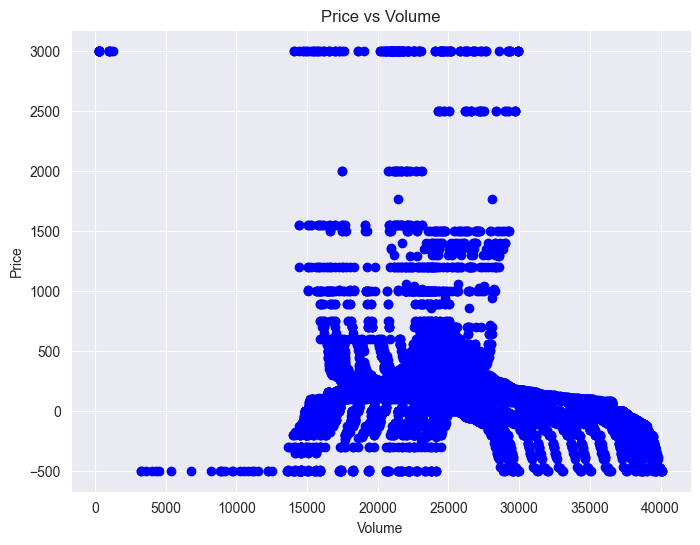

Correlation between Price and Volume: -0.27560855118364913


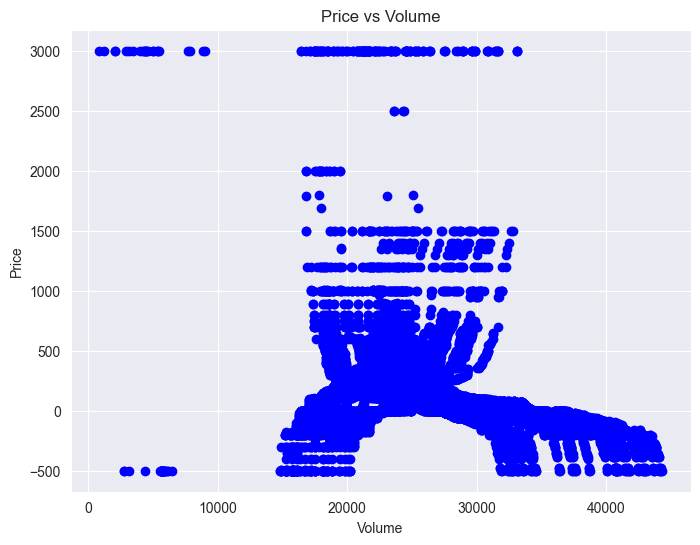

Correlation between Price and Volume: -0.1288628749574532


KeyboardInterrupt: 

In [11]:
# The relationship between the prices and volumes

# Calculate the correlation between Price and Volume
for df in data_frames_sorted:
    correlation = df['Volume'].corr(df['Price'])
    print(f"Correlation between Price and Volume: {correlation}")
    # Scatter plot of Price vs Volume
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Volume'], df['Price'], color='blue')
    plt.title('Price vs Volume')
    plt.xlabel('Volume')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()
    
    #Observation: Negative correlation which means when the Volume variable increases, the Price variable decreases. They move in opposite direction


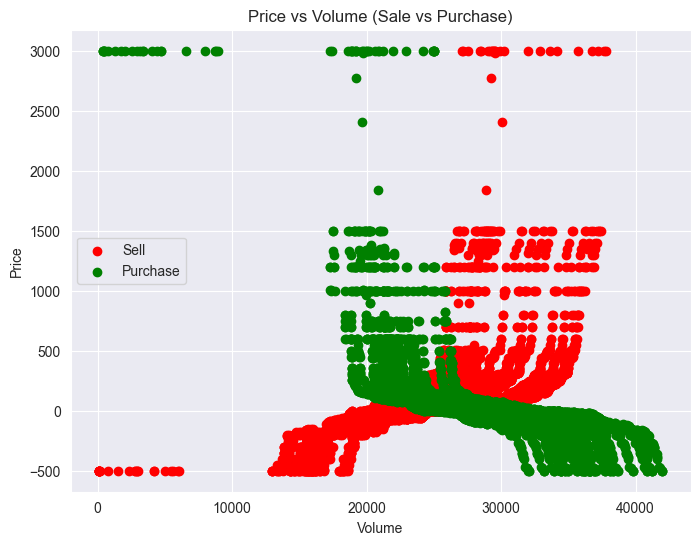

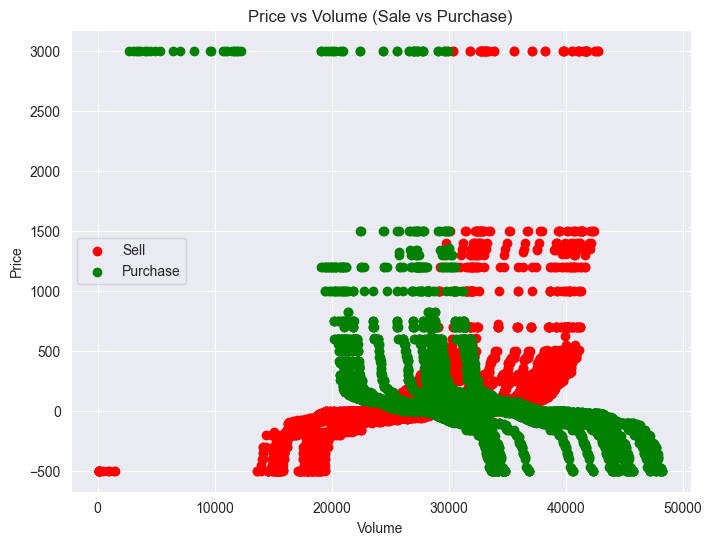

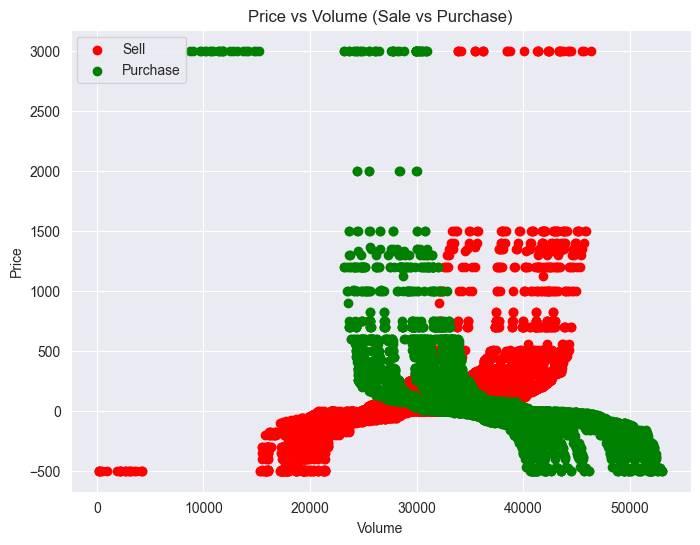

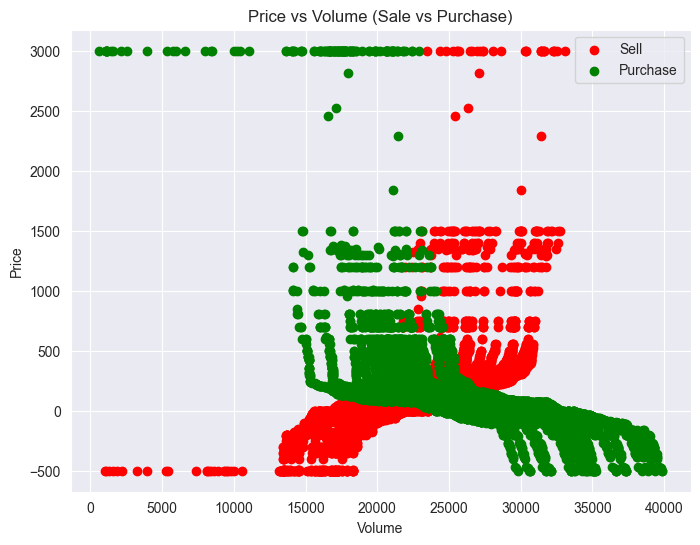

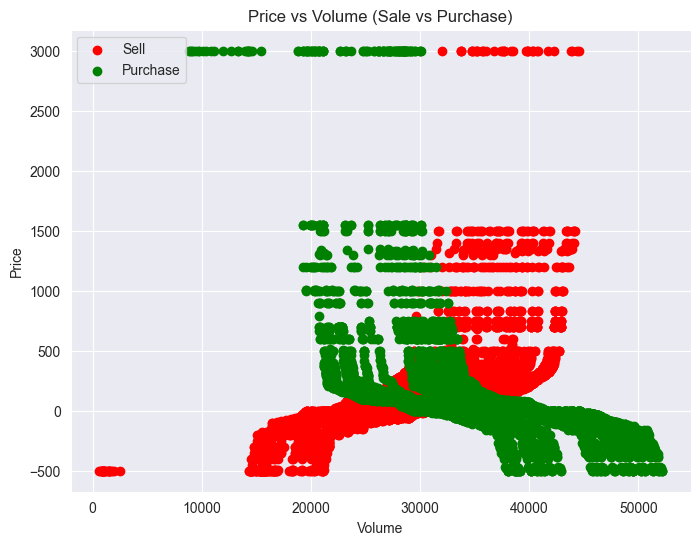

KeyboardInterrupt: 

In [12]:
for df in data_frames_sorted:

    # Separate the data into 'Sell' and 'Purchase'
    sell_data = df[df['Sale/Purchase'] == 'Sell']
    purchase_data = df[df['Sale/Purchase'] == 'Purchase']
    
    # Scatter plot for Sell
    plt.figure(figsize=(8, 6))
    plt.scatter(sell_data['Volume'], sell_data['Price'], color='red', label='Sell')
    plt.scatter(purchase_data['Volume'], purchase_data['Price'], color='green', label='Purchase')
    plt.title('Price vs Volume (Sale vs Purchase)')
    plt.ylabel('Price')
    plt.xlabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    #Observation:
    #Ascending curves for Sells / Descending curves for Purchases
    # volume is under 10k : when the Price is negative we have only Sales, when the price is positive we have only purchases.
    # Volume between 10k and 20k: when the price is negative we have only Sales, when the price is positive only Purchase. 
    # Volume between 20k and 30k : the price is positive and we have MCP.
    # Volume is over 30k: When the price is negative Purchase and when the price is positive only sell.
    # At 25k the values of the prices mirror each other   

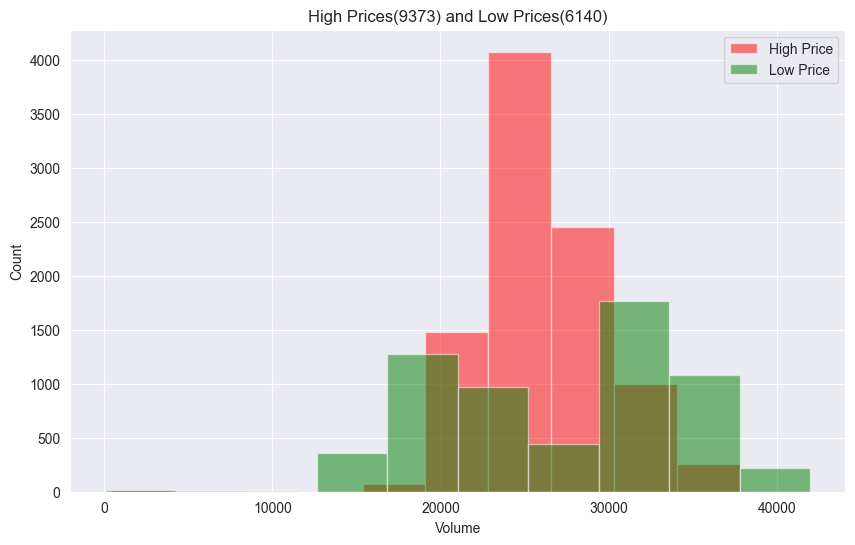

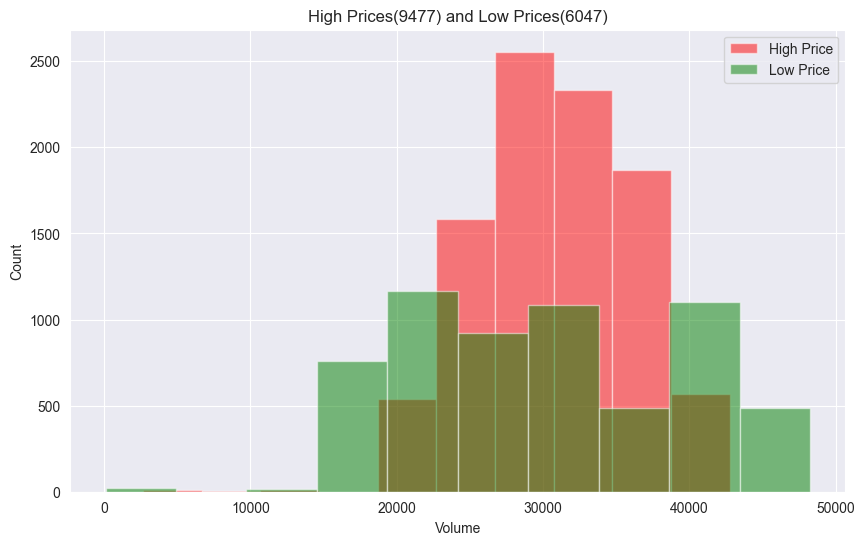

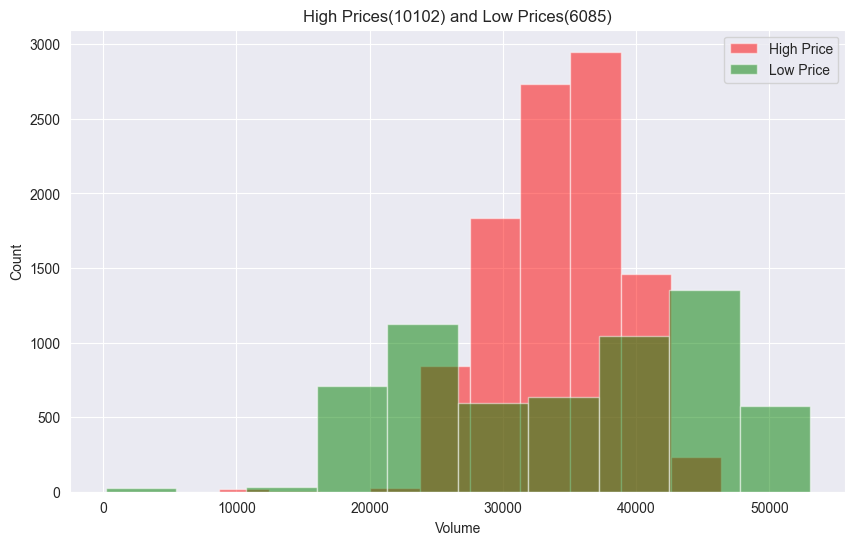

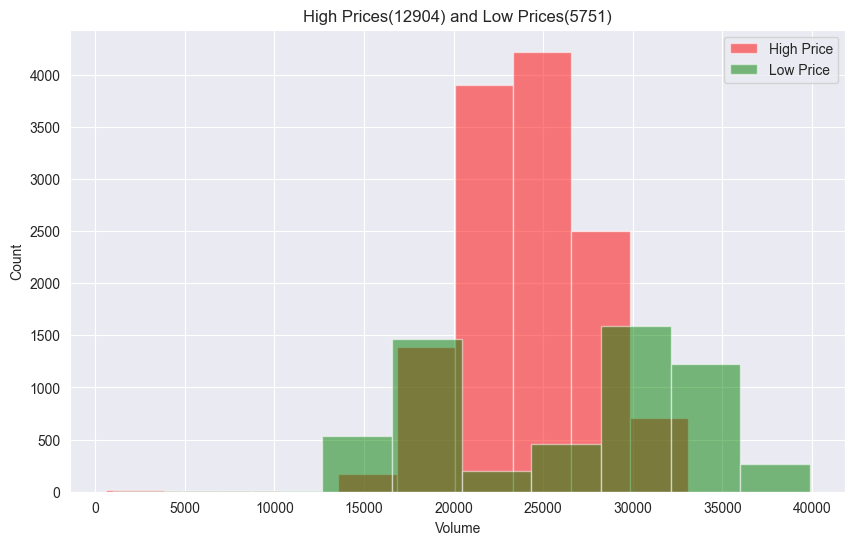

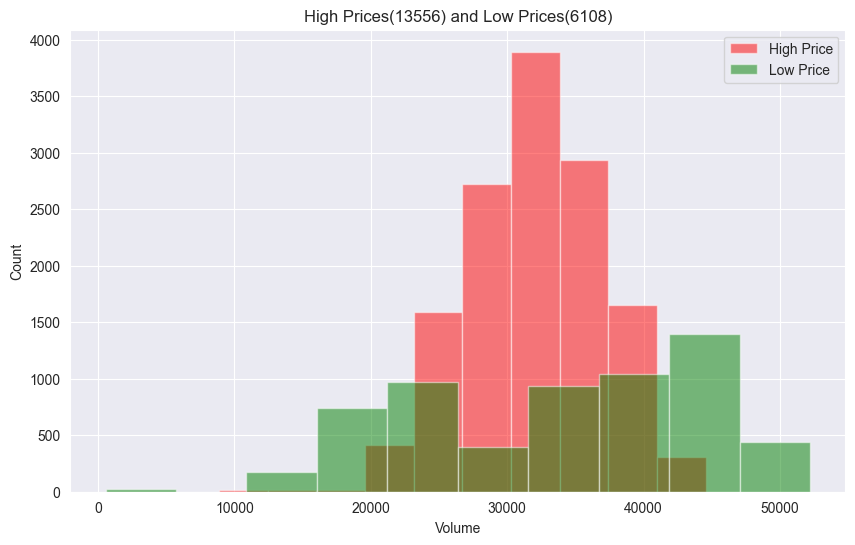

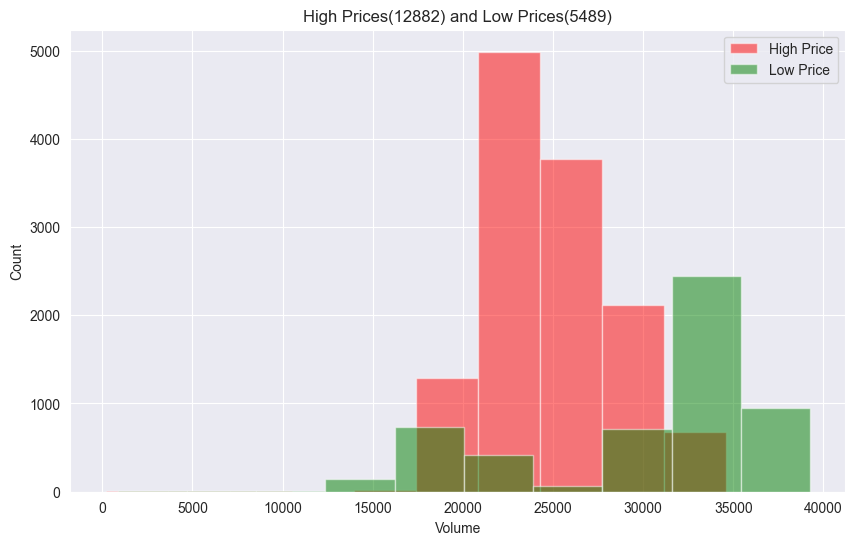

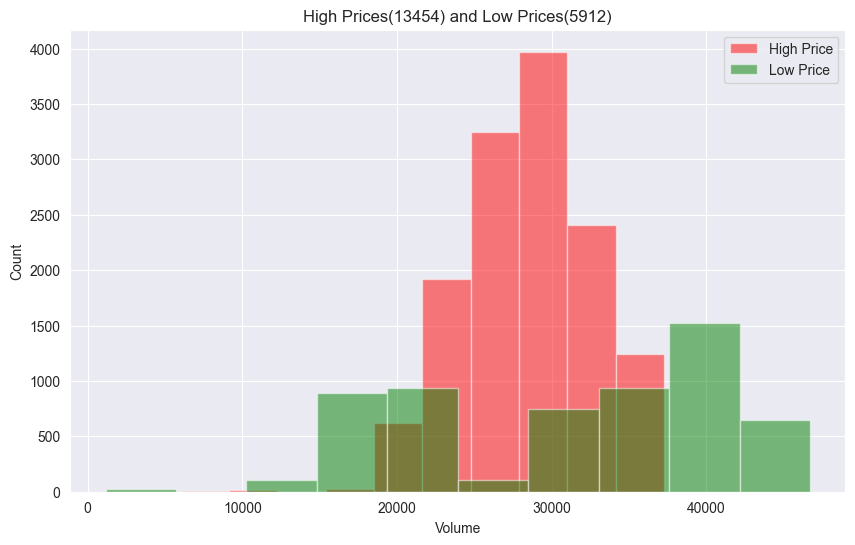

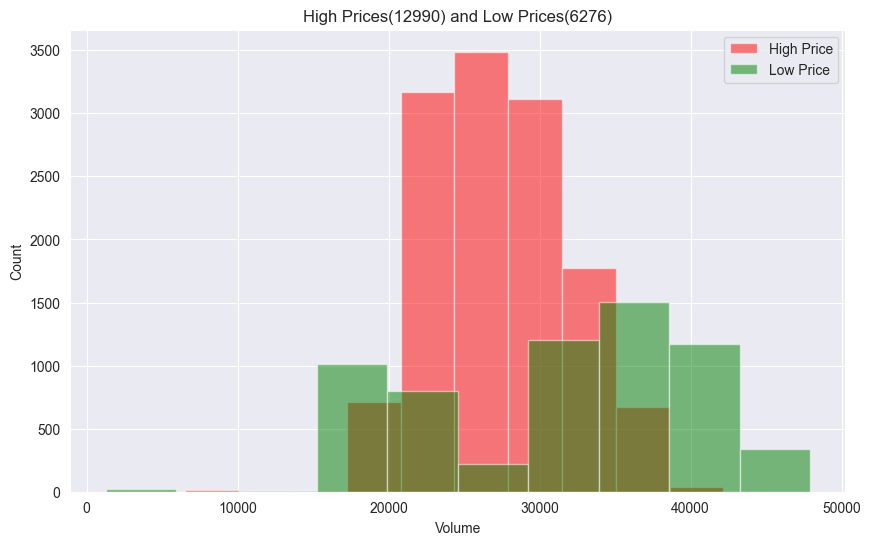

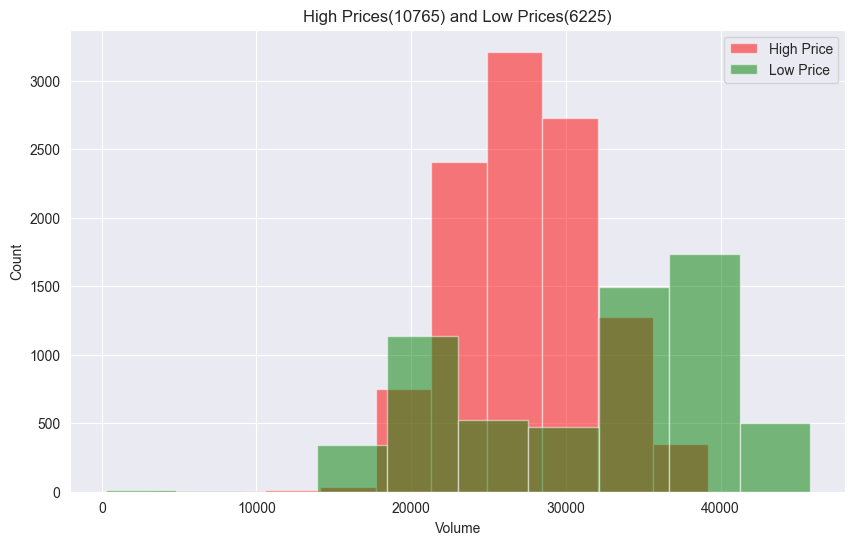

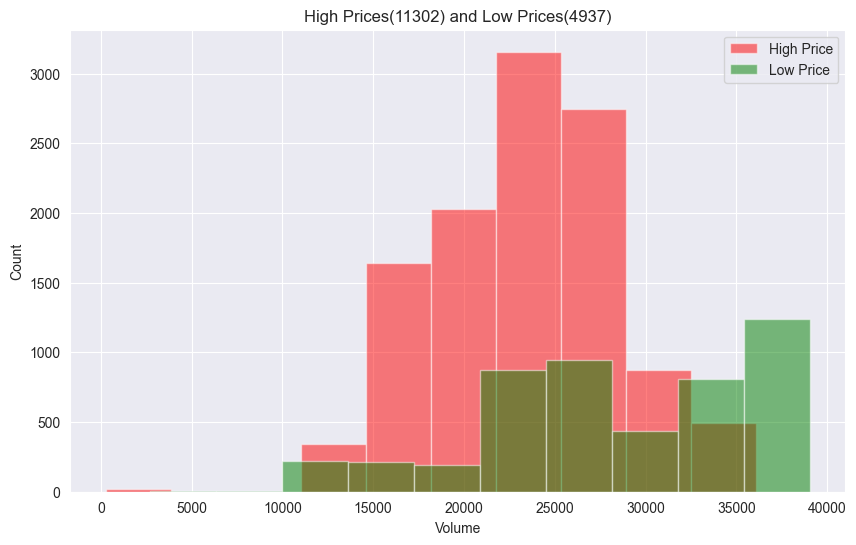

KeyboardInterrupt: 

In [13]:
#How many pairs do I have (pair of price and volume) with high prices and how many pairs I have with low prices
for df in data_frames_sorted:
    # Define a threshold for high and low prices
    threshold = 0  # Adjustable
    
    # Categorize data into high and low prices
    df['Price_Category'] = ['High' if price > threshold else 'Low' for price in df['Price']]
    
    # Count the pairs of high and low prices
    high_price_count = df[df['Price_Category'] == 'High'].shape[0]
    low_price_count = df[df['Price_Category'] == 'Low'].shape[0]
    
    
    
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df[df['Price_Category'] == 'High']['Volume'], bins=10, alpha=0.5, label='High Price', color='red')
    plt.hist(df[df['Price_Category'] == 'Low']['Volume'], bins=10, alpha=0.5, label='Low Price', color='green')
    plt.title(f'High Prices({high_price_count}) and Low Prices({low_price_count})')
    plt.xlabel('Volume')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.show()
    #Observation : High prices occurs at most when the volume is between 20k and 30k 

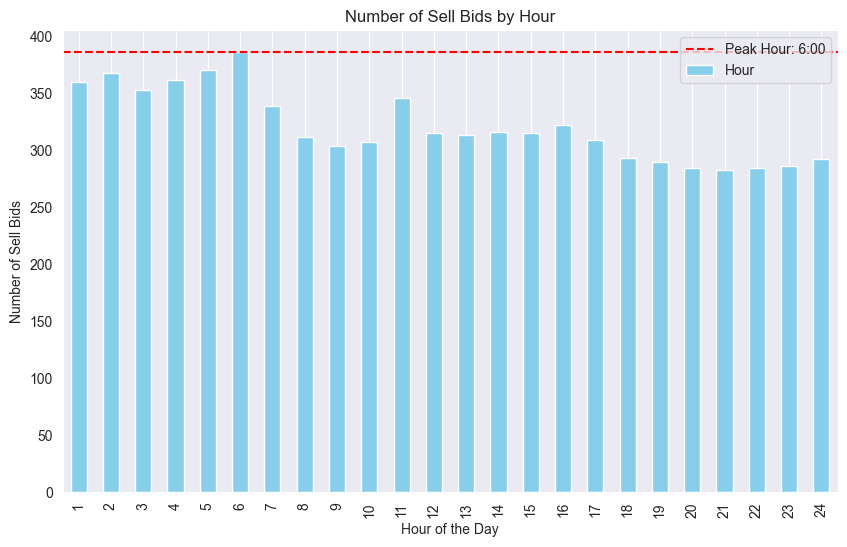

The hour with the most sell bids is 6:00 with 386 sell bids.


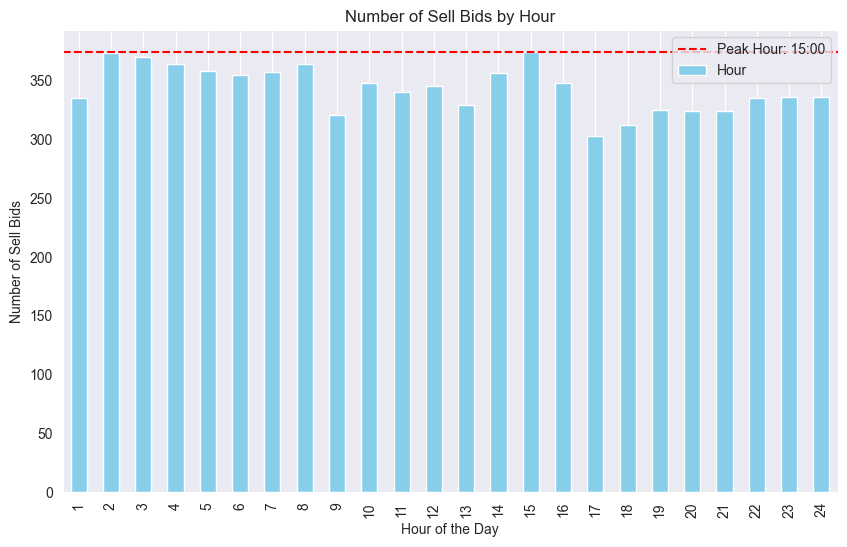

The hour with the most sell bids is 15:00 with 374 sell bids.


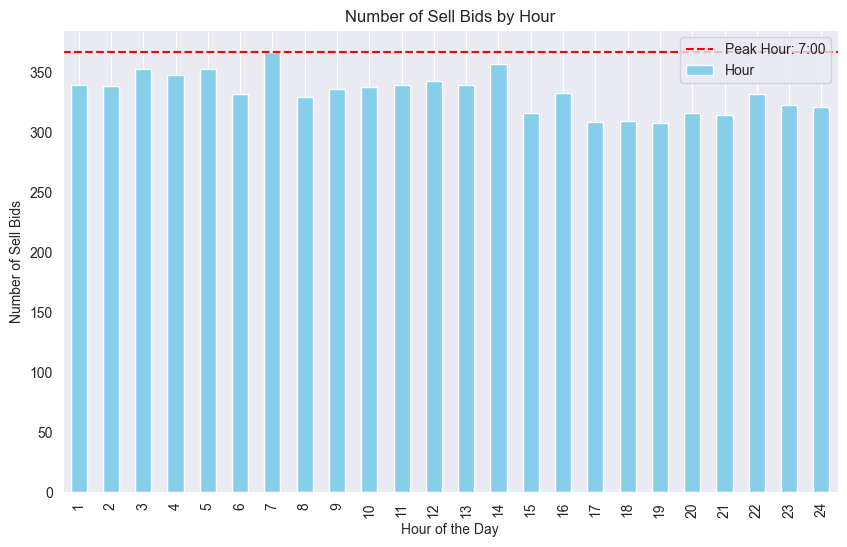

The hour with the most sell bids is 7:00 with 367 sell bids.


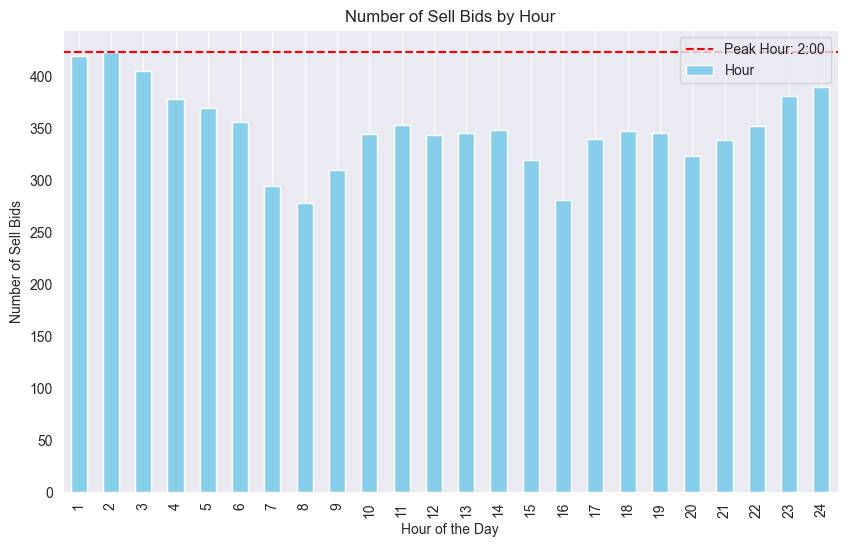

The hour with the most sell bids is 2:00 with 423 sell bids.


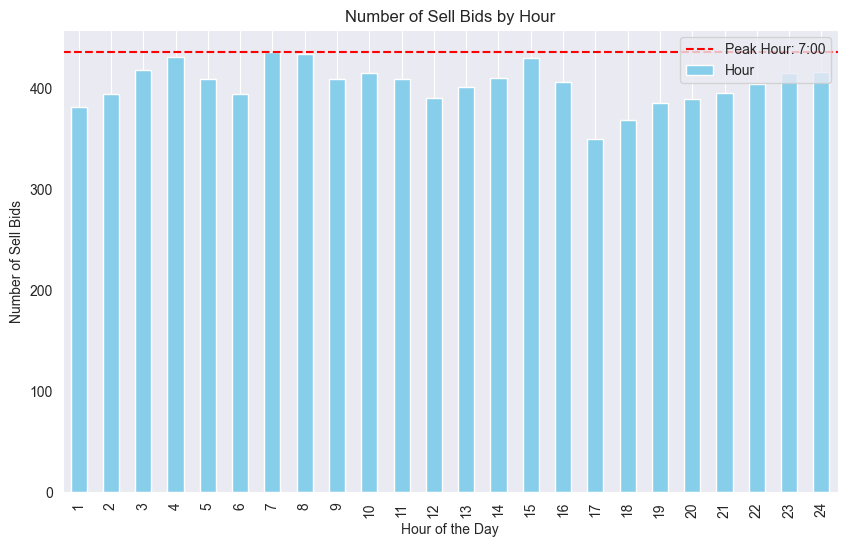

The hour with the most sell bids is 7:00 with 436 sell bids.


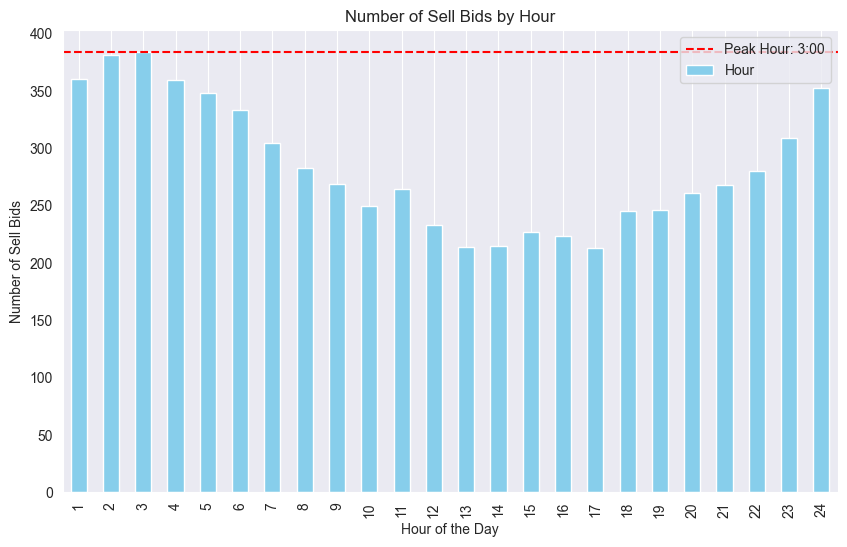

The hour with the most sell bids is 3:00 with 384 sell bids.


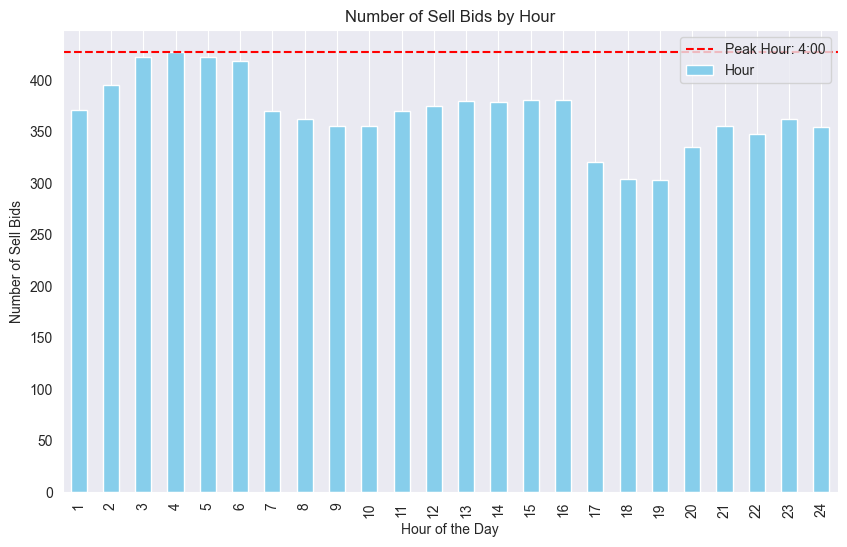

The hour with the most sell bids is 4:00 with 427 sell bids.


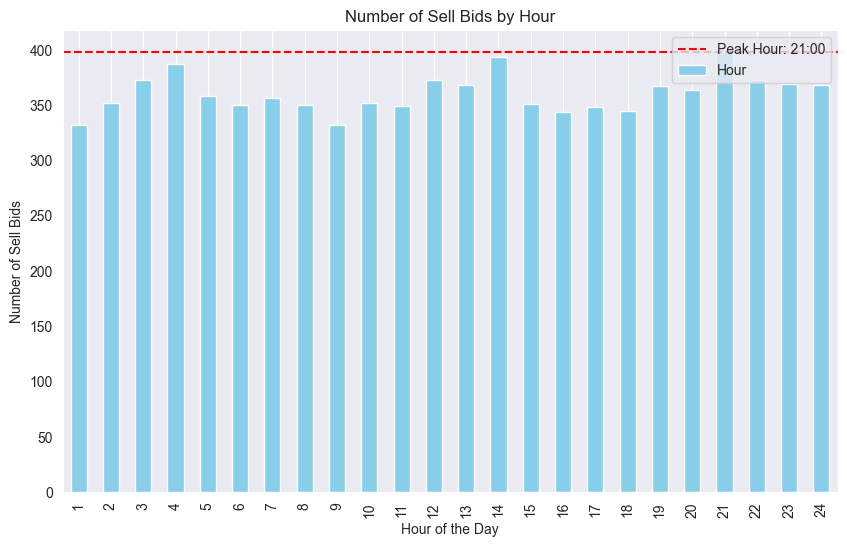

The hour with the most sell bids is 21:00 with 398 sell bids.


KeyboardInterrupt: 

In [14]:
#-Distribution per Hour: is there a concrete Hour in which we see many sell bids

for df in data_frames_sorted:
    def find_peak_sell_hour_with_plot(df):
        # Filter the DataFrame to include only sell bids
        sell_bids = df[df['Sale/Purchase'] == 'Sell']
    
        # Count the number of sell bids for each hour
        sell_bids_by_hour = sell_bids['Hour'].value_counts().sort_index()
    
        # Find the hour with the maximum sell bids
        peak_sell_hour = sell_bids_by_hour.idxmax()
        max_sell_bids = sell_bids_by_hour.max()
    
        # Plotting the results
        plt.figure(figsize=(10, 6))
        sell_bids_by_hour.plot(kind='bar', color='skyblue')
        plt.axhline(y=max_sell_bids, color='r', linestyle='--', label=f'Peak Hour: {peak_sell_hour}:00')
        plt.title('Number of Sell Bids by Hour')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Number of Sell Bids')
        plt.legend()
        plt.grid(axis='y')
        plt.show()
    
        return peak_sell_hour, max_sell_bids
    
    # Use the function and plot the data
    peak_hour, count = find_peak_sell_hour_with_plot(df)
    print(f"The hour with the most sell bids is {peak_hour}:00 with {count} sell bids.")
    
    #Observation: Peak hours occurs often at Hours [1,3,7,10,24]

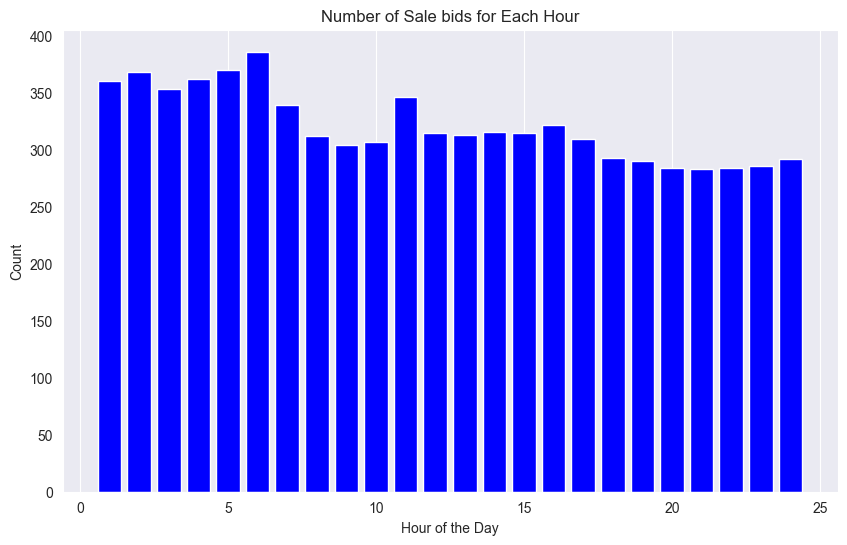

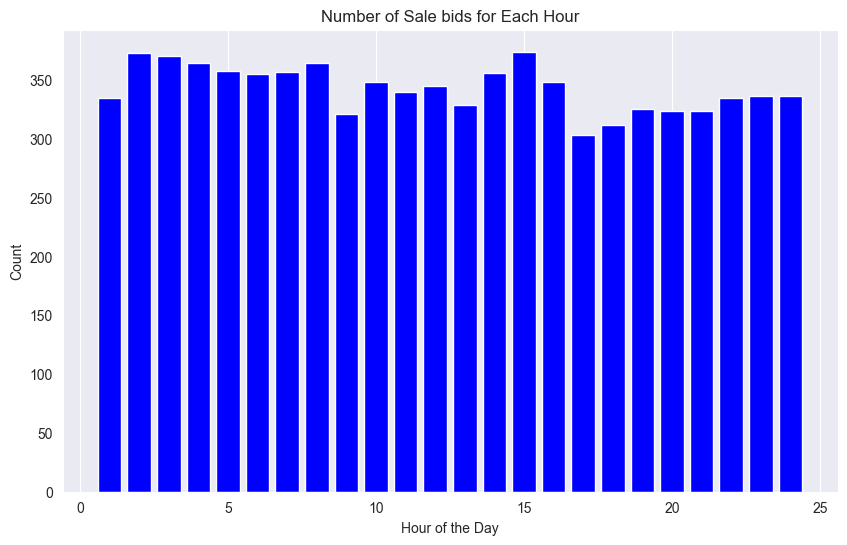

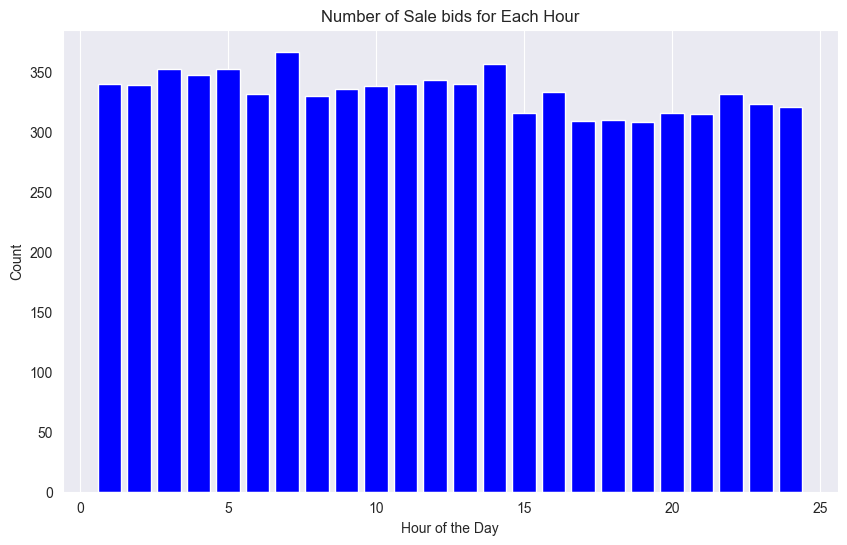

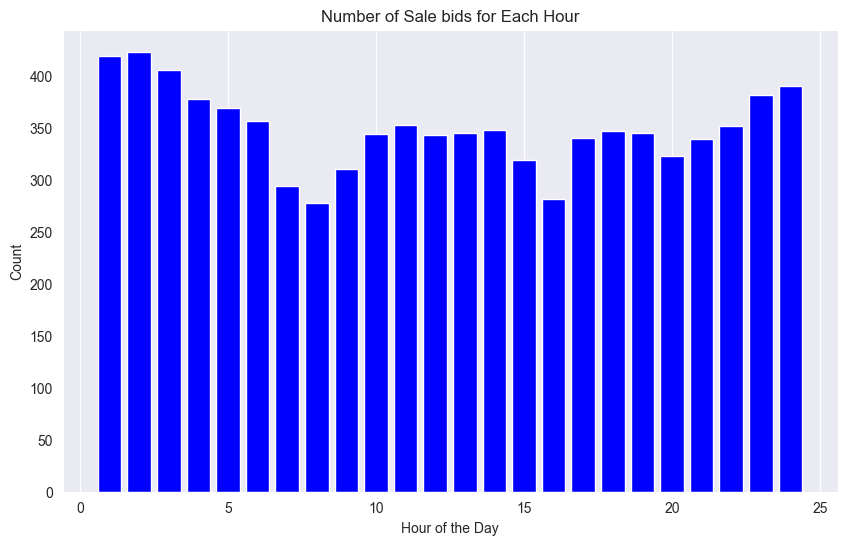

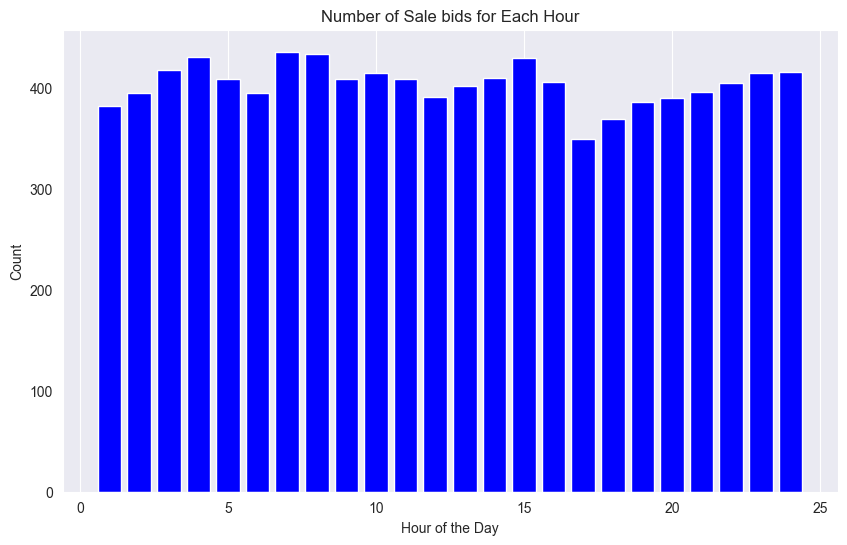

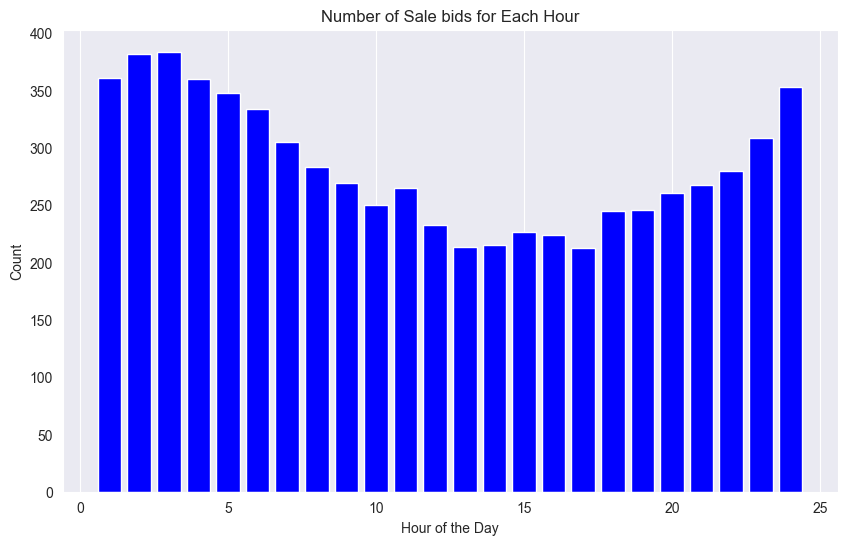

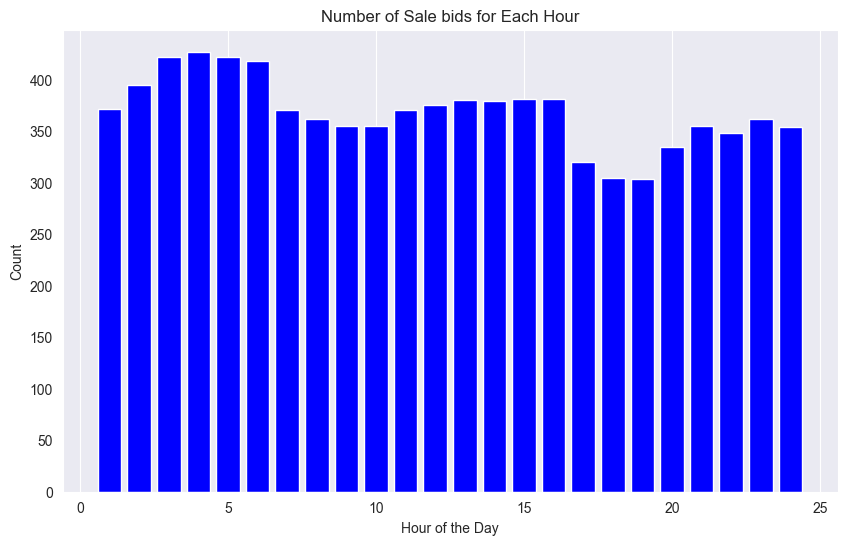

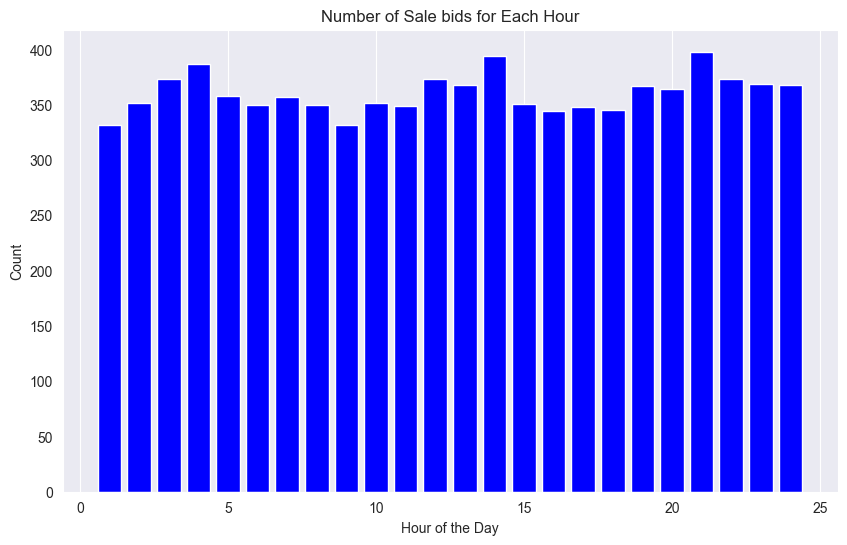

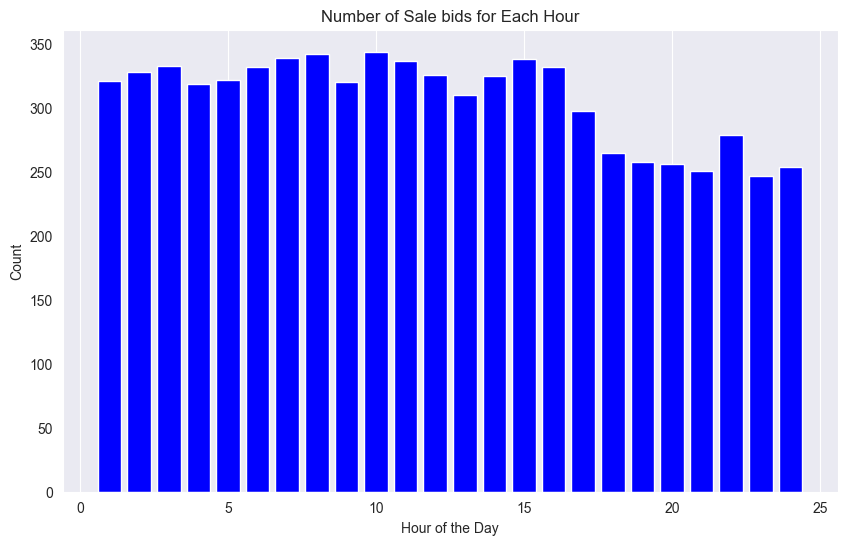

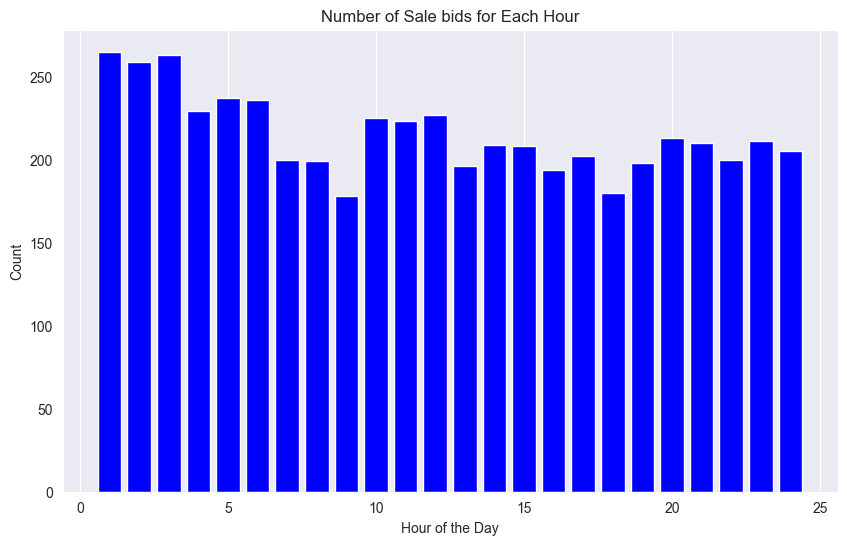

KeyboardInterrupt: 

In [15]:
#Count: number of rows that are for a sell side for a specific Hour
for df in data_frames_sorted:
    # Initialize lists to store hourly data
    hourly_volumes = []

    # Iterate over each hour from 1 to 24
    for hour in range(1, 25):
        # Filter the DataFrame to include only rows for the current hour
        hour_data = df[df['Hour'] == hour]
        hour_data = hour_data[hour_data['Sale/Purchase'] == 'Sell']
        # Sum the volumes for the current hour
        total_volume_hour = hour_data['Volume'].count()
        hourly_volumes.append(total_volume_hour)

    # Plotting the result
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 25), hourly_volumes, color='blue')
    plt.title('Number of Sale bids for Each Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.show()

#Observation: Number of Sale bids is mostly at its maximum during the first and last hours

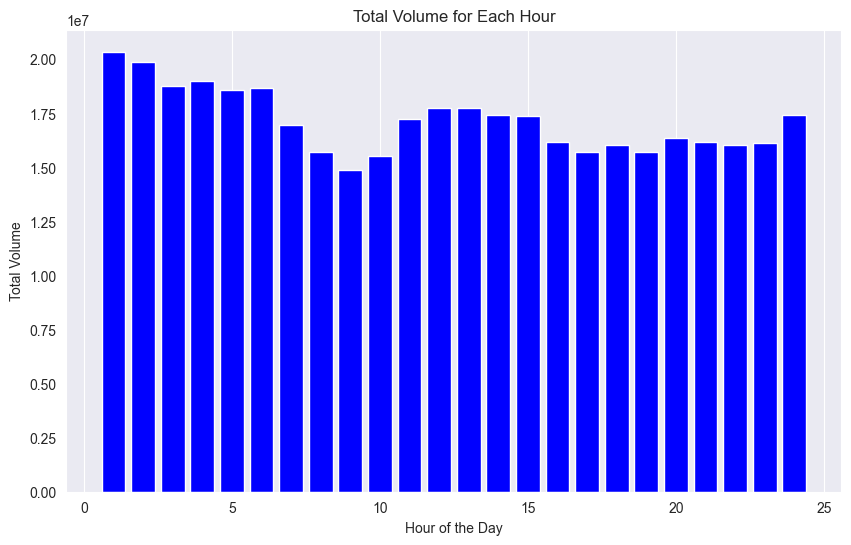

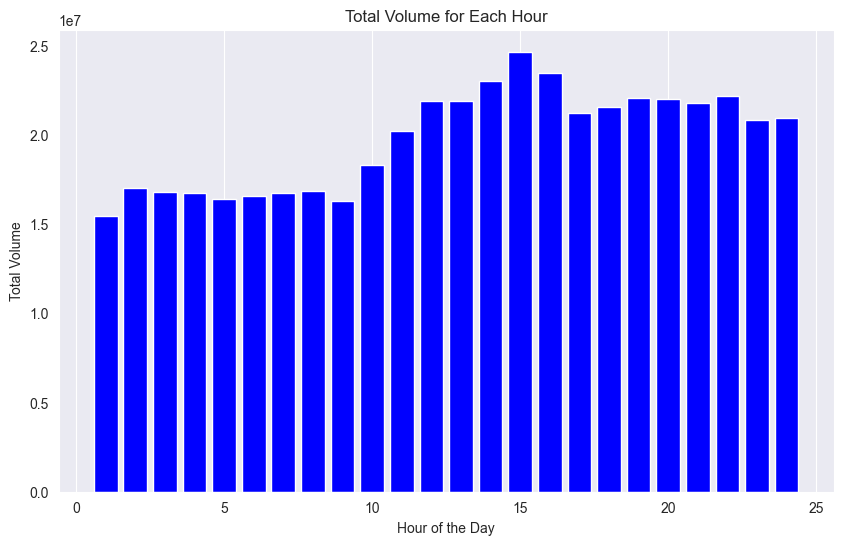

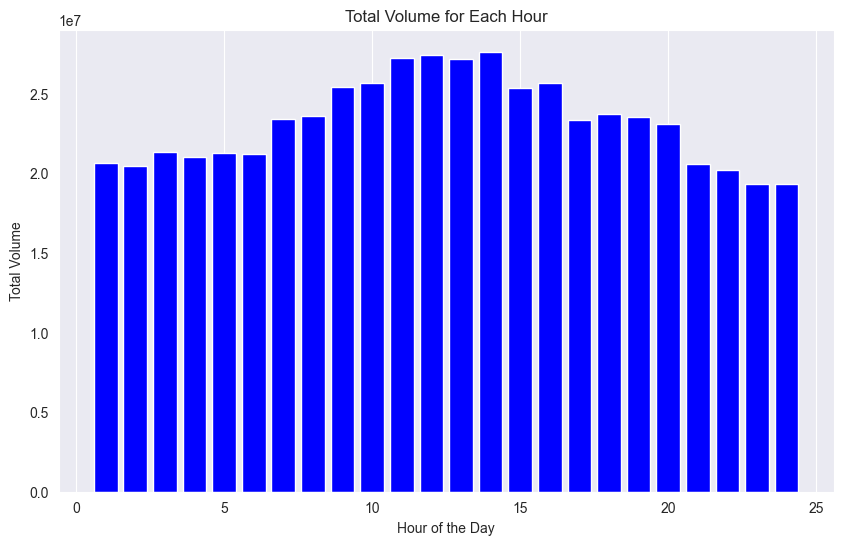

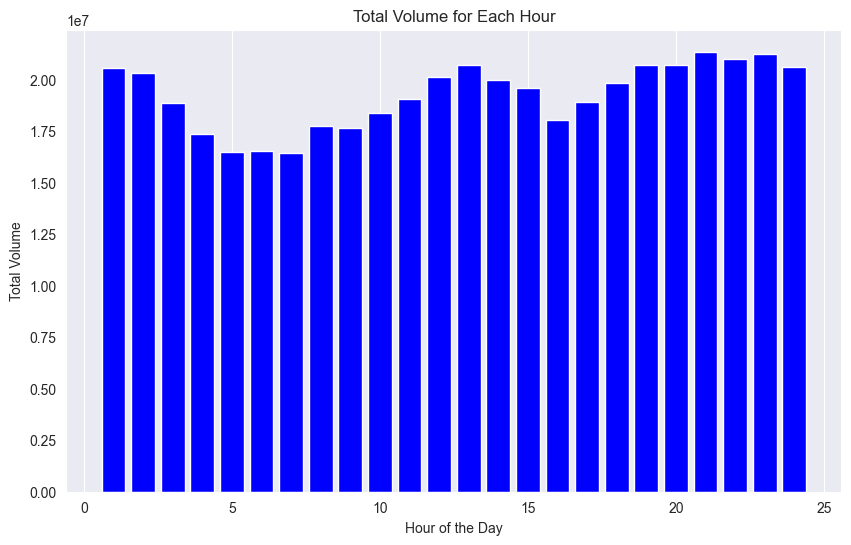

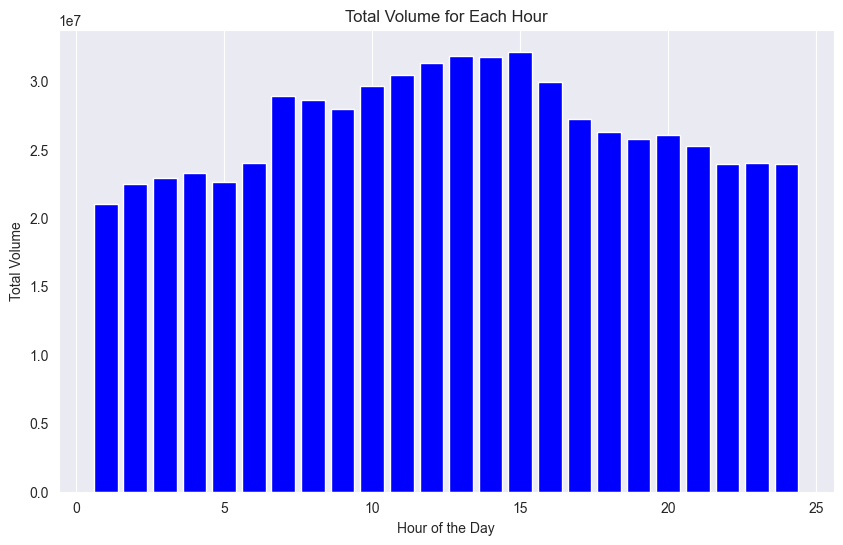

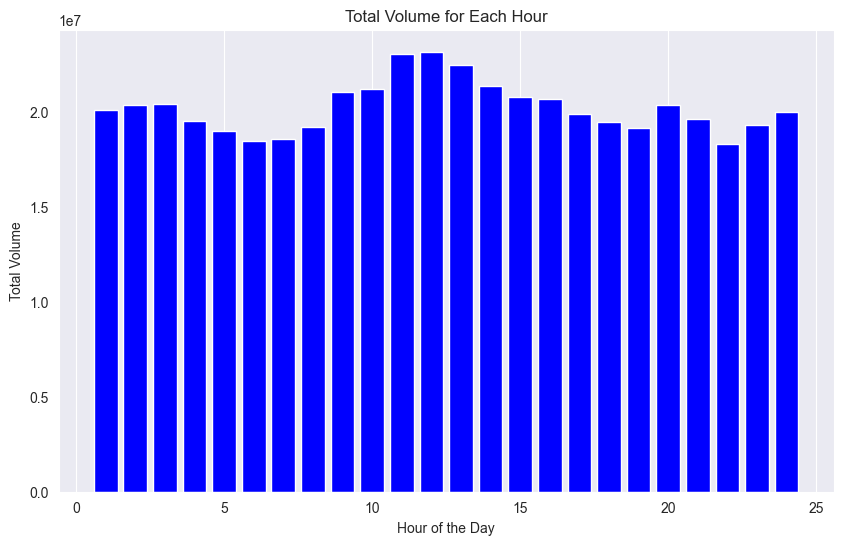

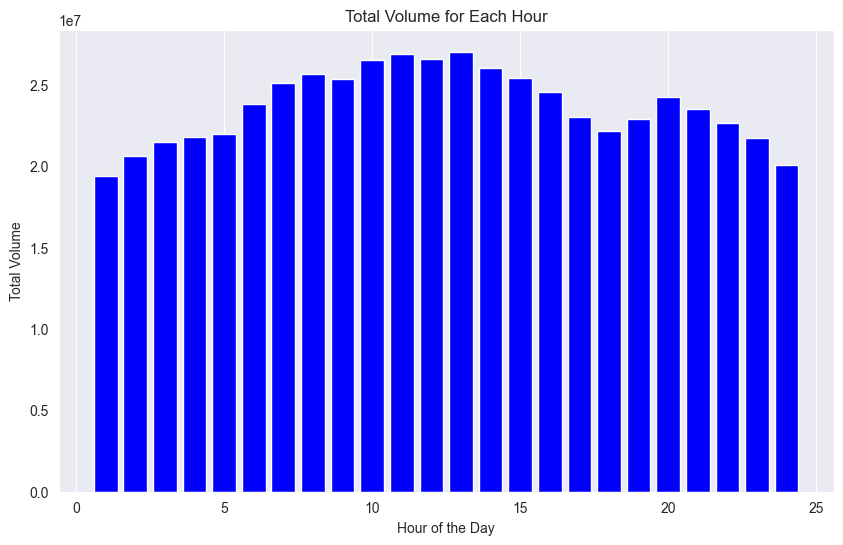

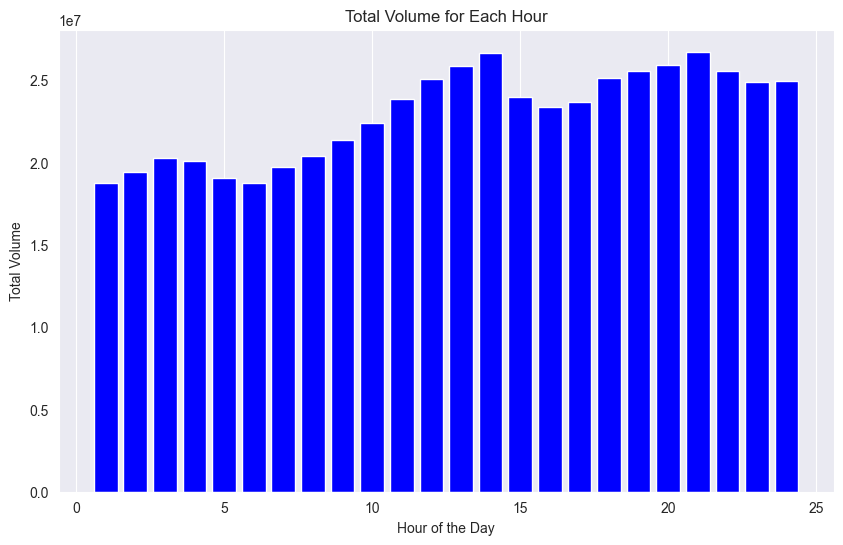

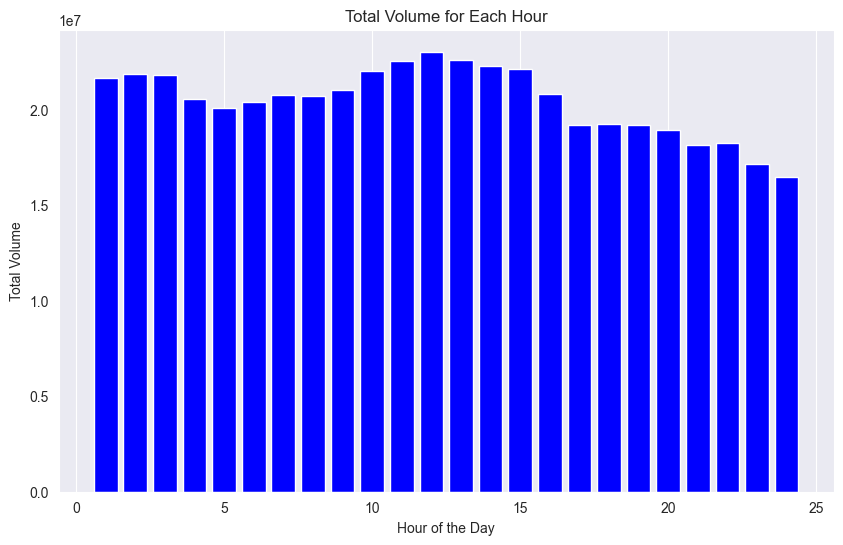

KeyboardInterrupt: 

In [16]:
#Quantity: the sum of the Volumes of all rows according to each hour

for df in data_frames_sorted:
    # Initialize lists to store hourly data
    hourly_volumes = []

    # Iterate over each hour from 1 to 24
    for hour in range(1, 25):
        # Filter the DataFrame to include only rows for the current hour
        hour_data = df[df['Hour'] == hour]

        # Sum the volumes for the current hour
        total_volume_hour = hour_data['Volume'].sum()
        hourly_volumes.append(total_volume_hour)

    # Plotting the result
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 25), hourly_volumes, color='blue')
    plt.title('Total Volume for Each Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Total Volume')
    plt.grid(axis='y')
    plt.show()
    
    #observation : Total volume is mostly at its maximum between the 10th and 15th hour 


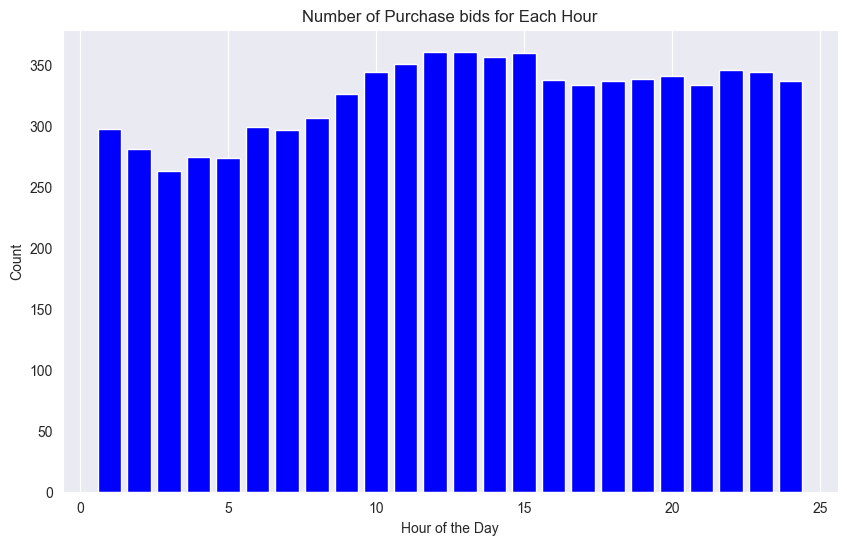

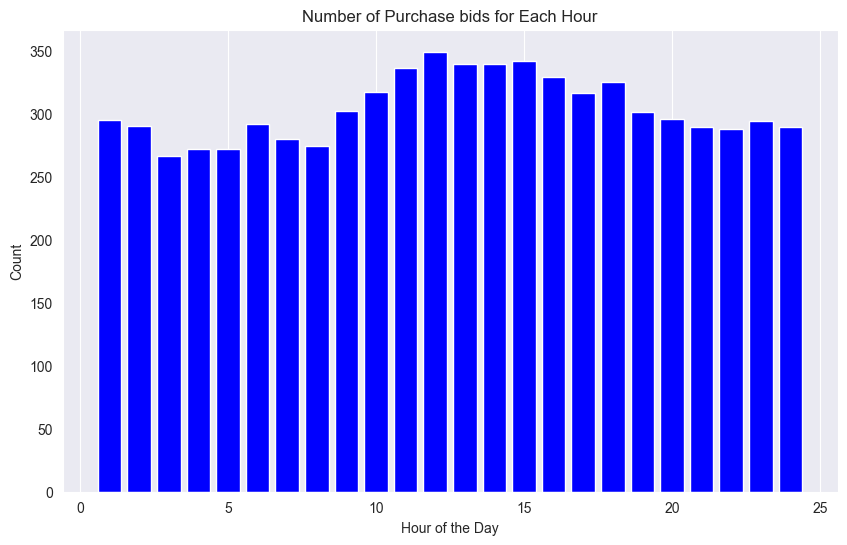

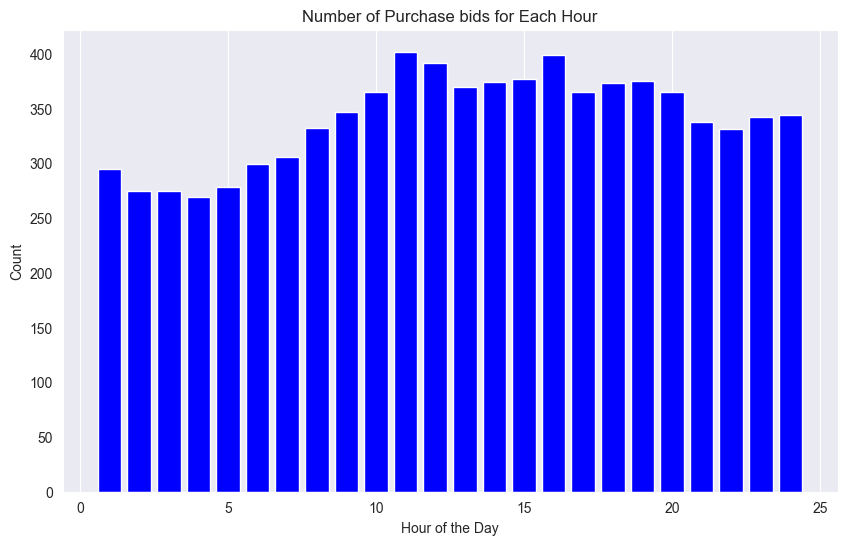

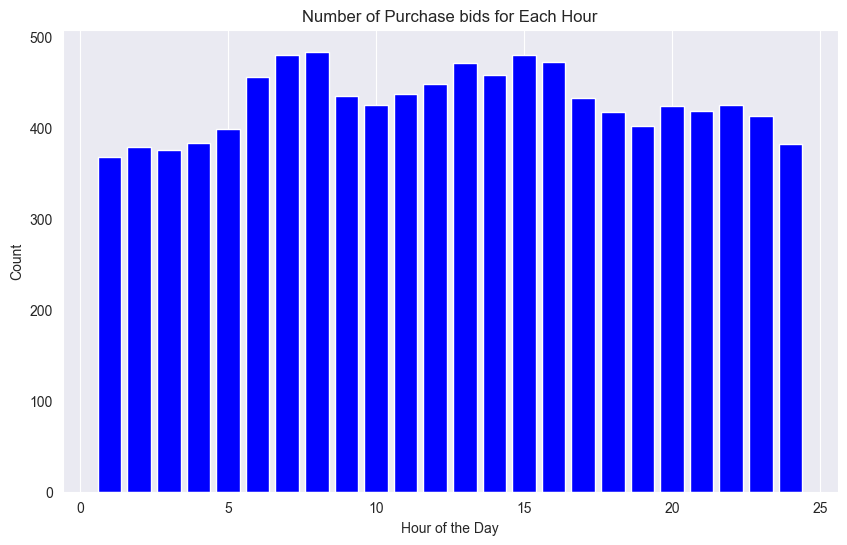

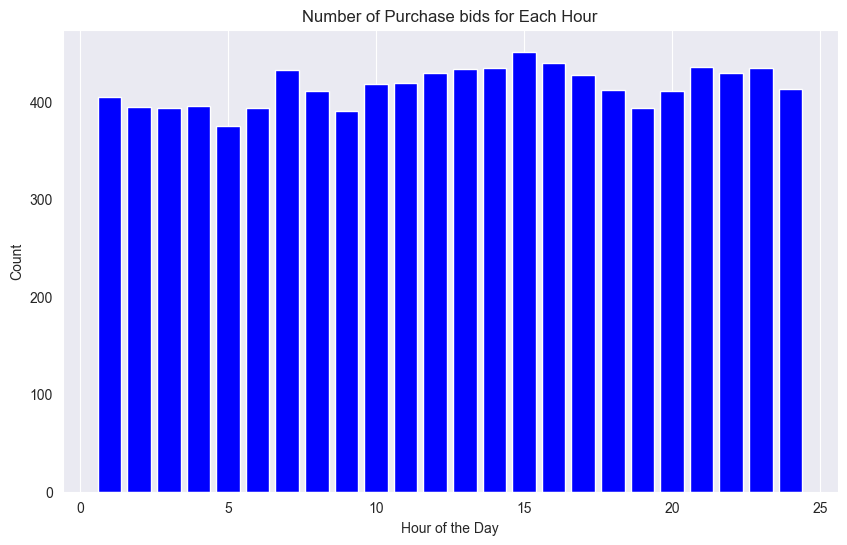

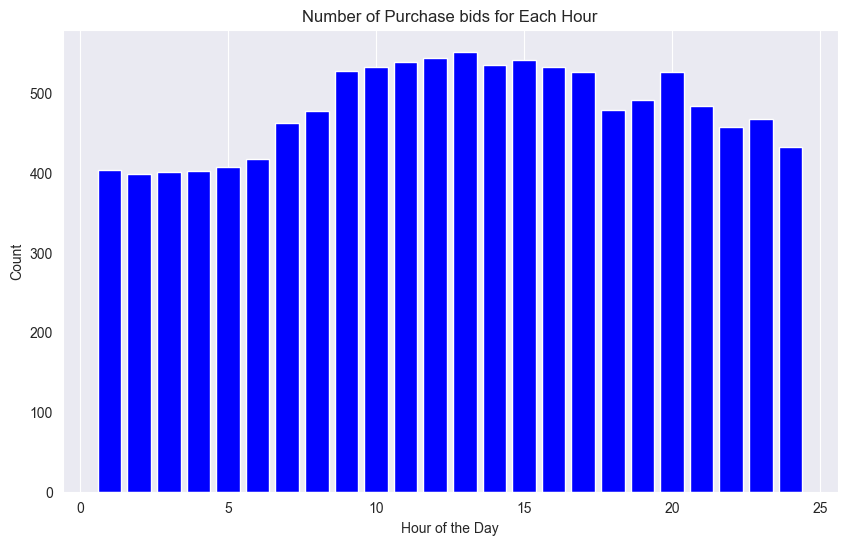

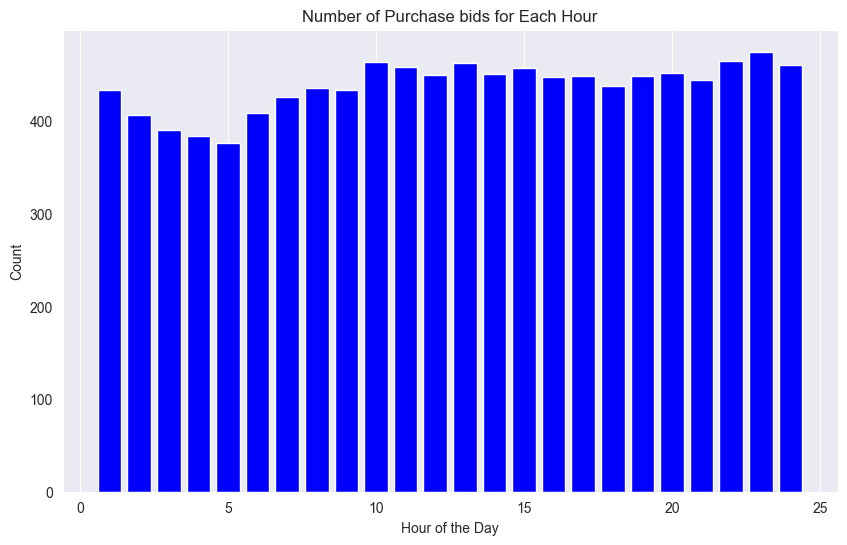

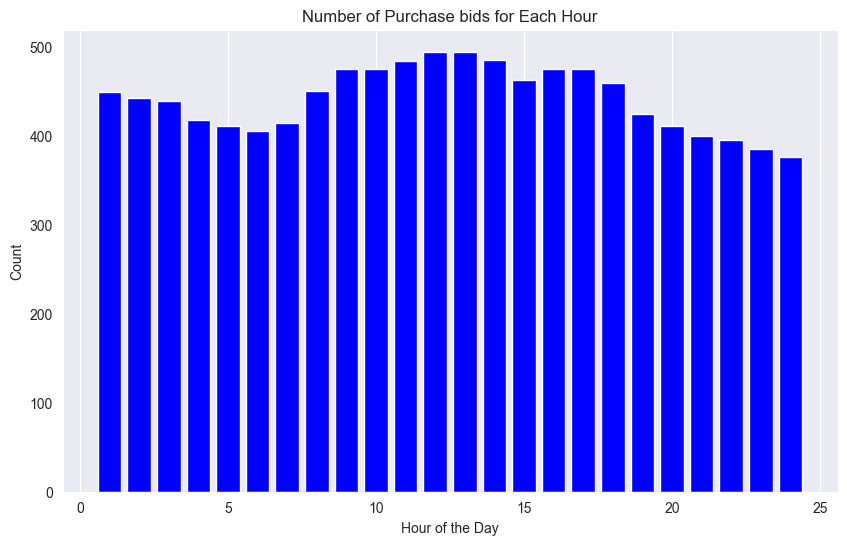

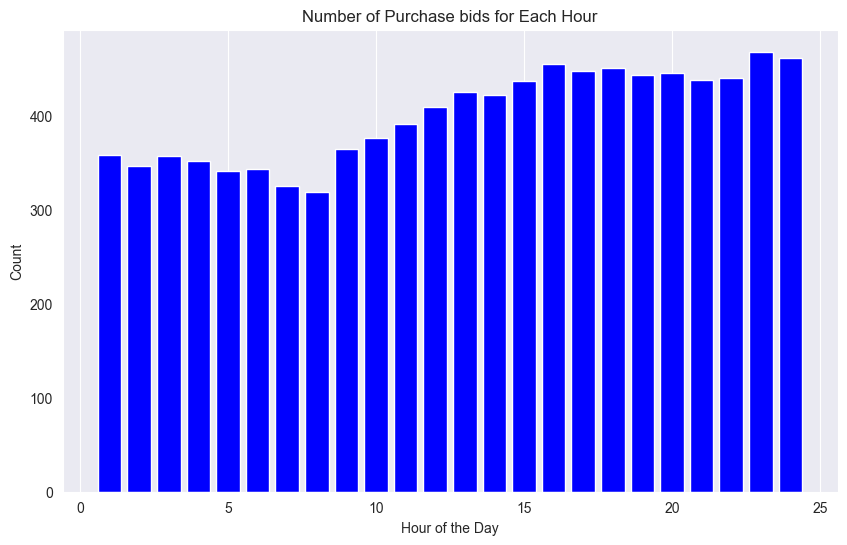

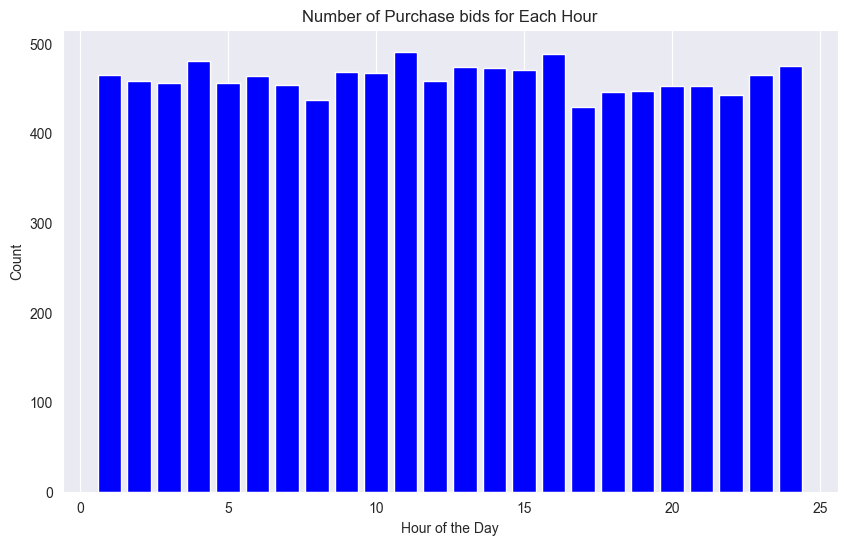

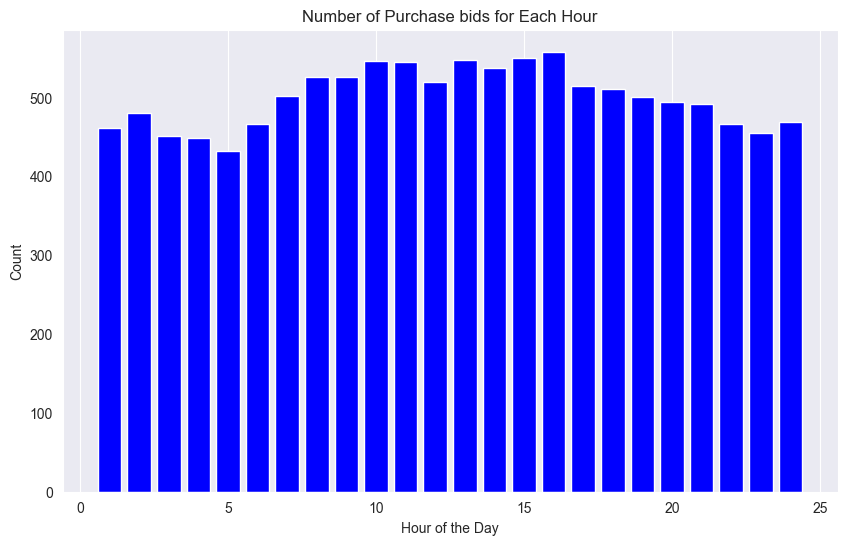

KeyboardInterrupt: 

In [17]:
#Count: number of rows that are for a Purchase side for a specific Hour
for df in data_frames_sorted:
    # Initialize lists to store hourly data
    hourly_volumes = []

    # Iterate over each hour from 1 to 24
    for hour in range(1, 25):
        # Filter the DataFrame to include only rows for the current hour
        hour_data = df[df['Hour'] == hour]
        hour_data = hour_data[hour_data['Sale/Purchase'] == 'Purchase']
        # Sum the volumes for the current hour
        total_volume_hour = hour_data['Volume'].count()
        hourly_volumes.append(total_volume_hour)

    # Plotting the result
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 25), hourly_volumes, color='blue')
    plt.title('Number of Purchase bids for Each Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.show()
    
    #Observation Number of Purchase bids is mostly at its maximum during the 12th hour and last 4 hours

In [18]:
import pandas as pd

# Load the CSV file
file_path = '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves/auction_aggregated_curves_germany_luxembourg_20220101.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


# 31/12/2021 13:00:13 PM : Aggregated Curves - Spot Market Auction - germany_luxembourg
Date       Week Week Day Hour Price   Volume                                       Sale/Purchase                                     
01/01/2022 52   6        1    -500.00 184.4                                                 Sell                                     
                                      15907.6                                               Sell                                     
                              -499.90 15908.2                                               Sell                                     
                                      16149.6                                               Sell

In [19]:
# Read the file again with proper header handling
data = pd.read_csv(file_path, header=1)

# Rename the columns for easier handling
data.columns = ['Date', 'Week', 'Week_Day', 'Hour', 'Price', 'Volume', 'Sale_Purchase']

# Drop rows where the Price is NaN
data = data.dropna(subset=['Price'])

# Convert Price to numeric type
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Display the cleaned dataframe
data.head()


Date  Week  Week_Day  Hour  Price   Volume Sale_Purchase
0  01/01/2022    52         6     1 -500.0    184.4          Sell
1  01/01/2022    52         6     1 -500.0  15907.6          Sell
2  01/01/2022    52         6     1 -499.9  15908.2          Sell
3  01/01/2022    52         6     1 -499.9  16149.6          Sell
4  01/01/2022    52         6     1 -498.0  16160.1          Sell

In [20]:
# Define a function to classify generators based on the Price column
def classify_generator(price):
    if price < 41:
        return 'Low Cost'
    elif 41 <= price <= 85:
        return 'Mid Cost'
    elif price >= 162:
        return 'Expensive Cost'

# Apply the classification function to the Price column
data['Generator_Type'] = data['Price'].apply(classify_generator)

# Display the dataframe with the new classification column
data.head()


Date  Week  Week_Day  Hour  Price   Volume Sale_Purchase  \
0  01/01/2022    52         6     1 -500.0    184.4          Sell   
1  01/01/2022    52         6     1 -500.0  15907.6          Sell   
2  01/01/2022    52         6     1 -499.9  15908.2          Sell   
3  01/01/2022    52         6     1 -499.9  16149.6          Sell   
4  01/01/2022    52         6     1 -498.0  16160.1          Sell   

  Generator_Type  
0       Low Cost  
1       Low Cost  
2       Low Cost  
3       Low Cost  
4       Low Cost

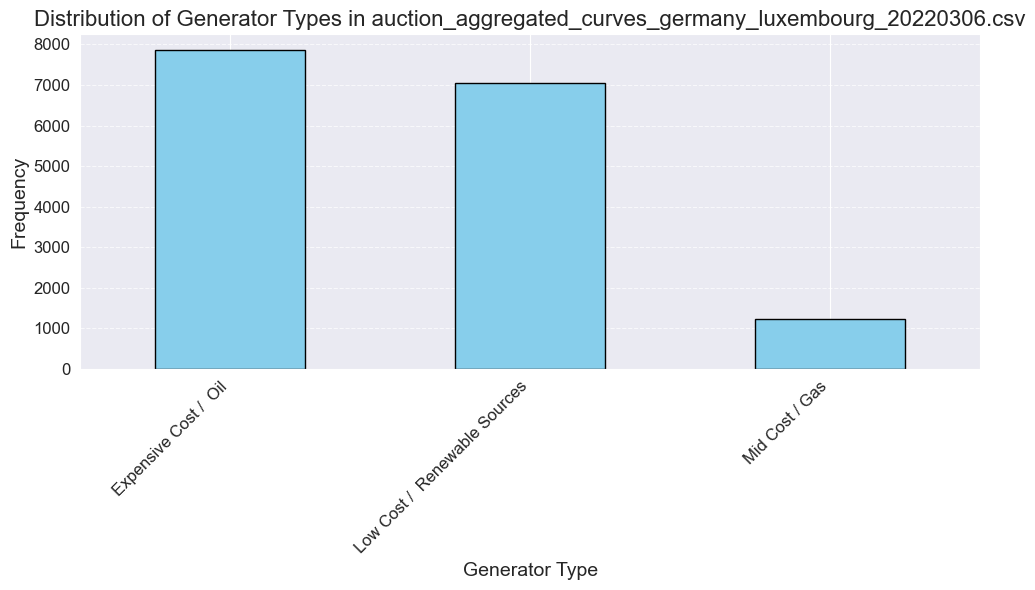

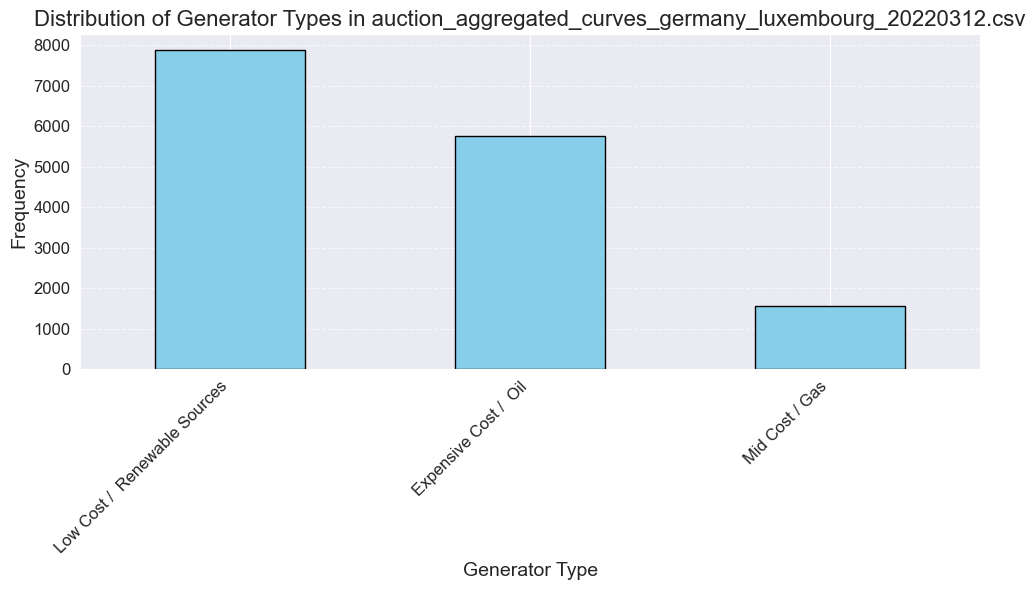

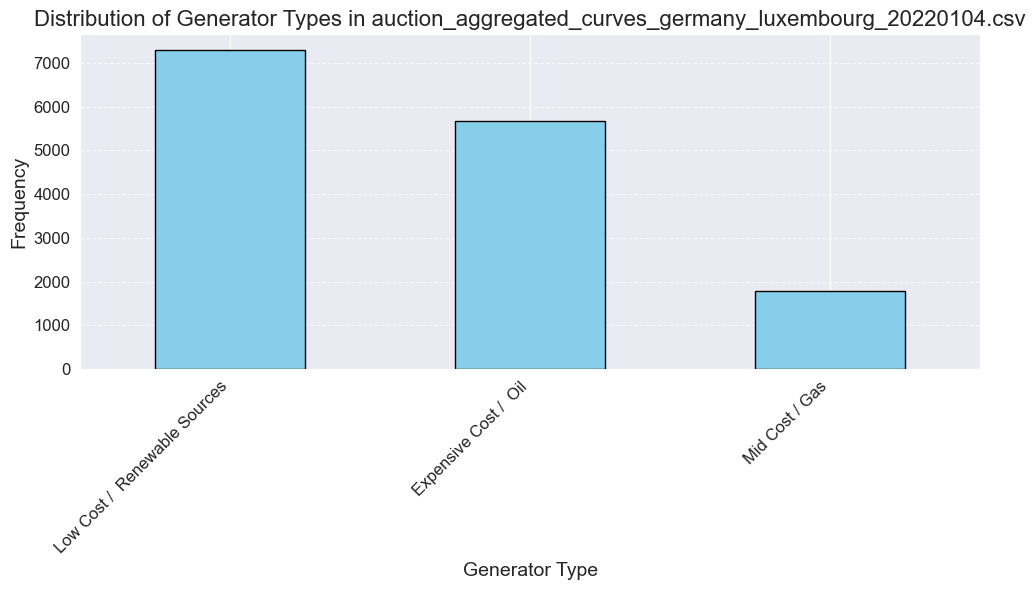

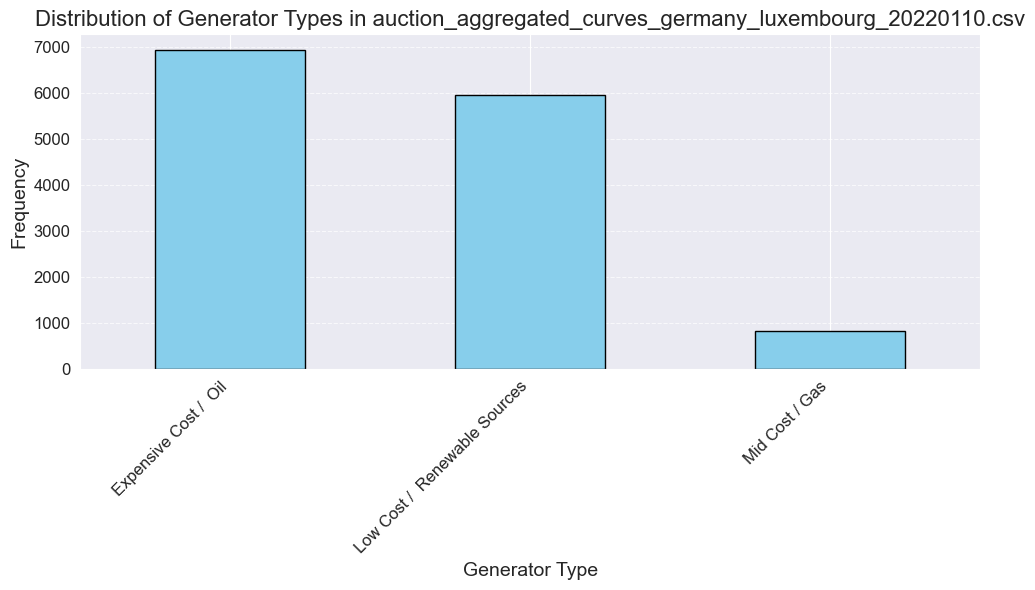

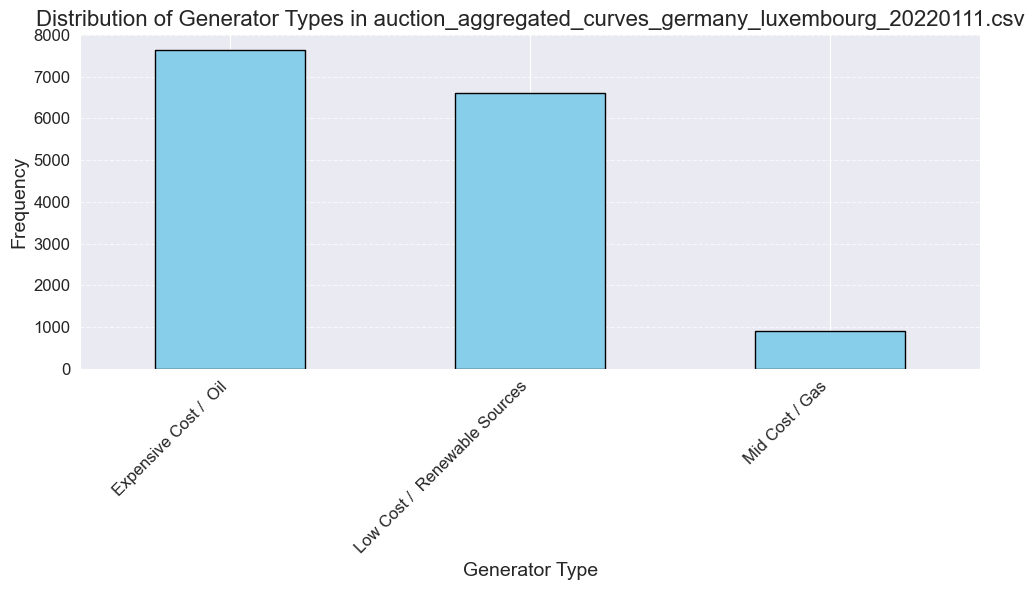

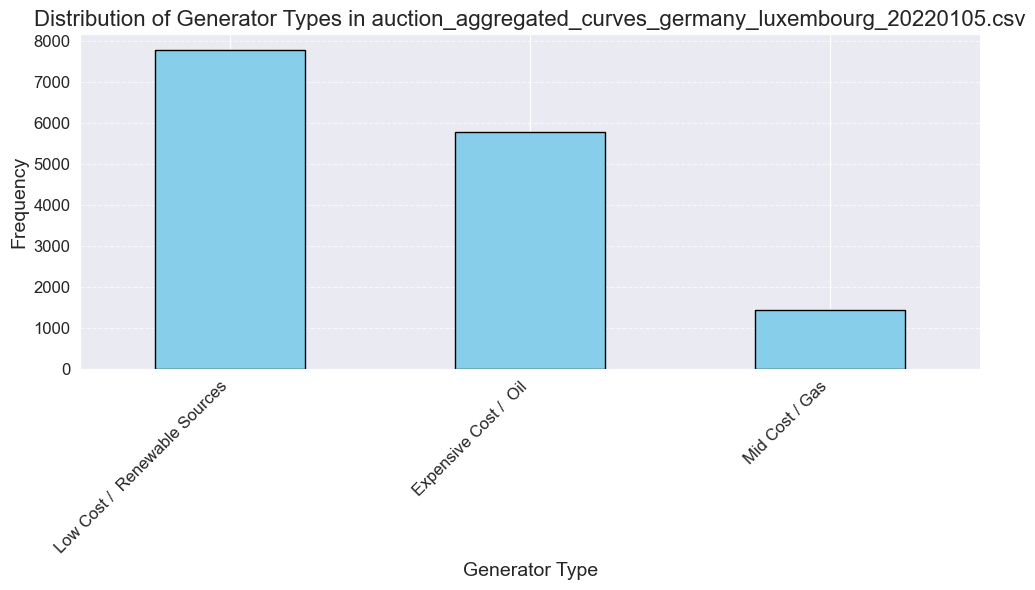

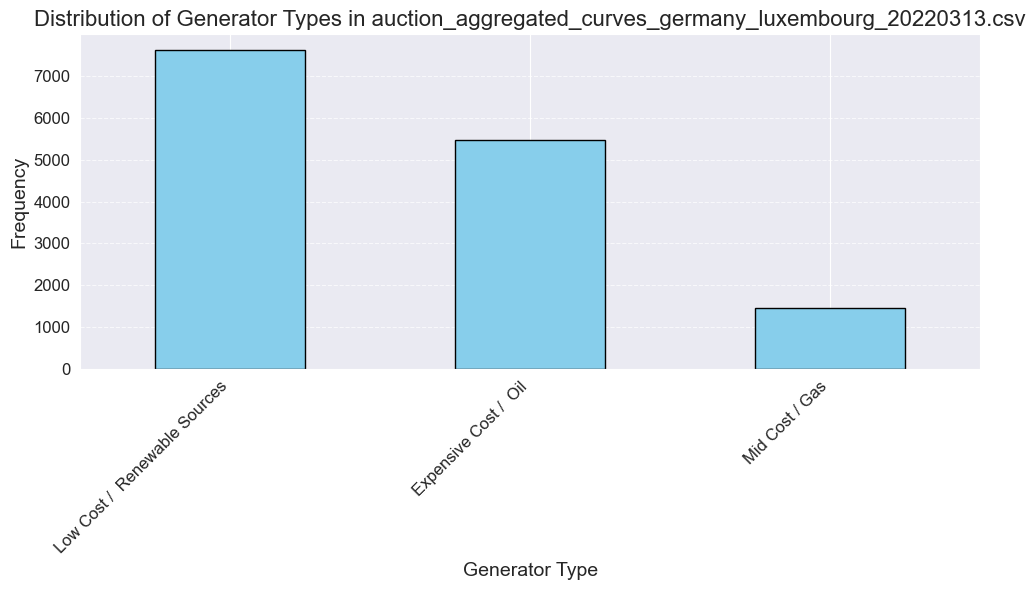

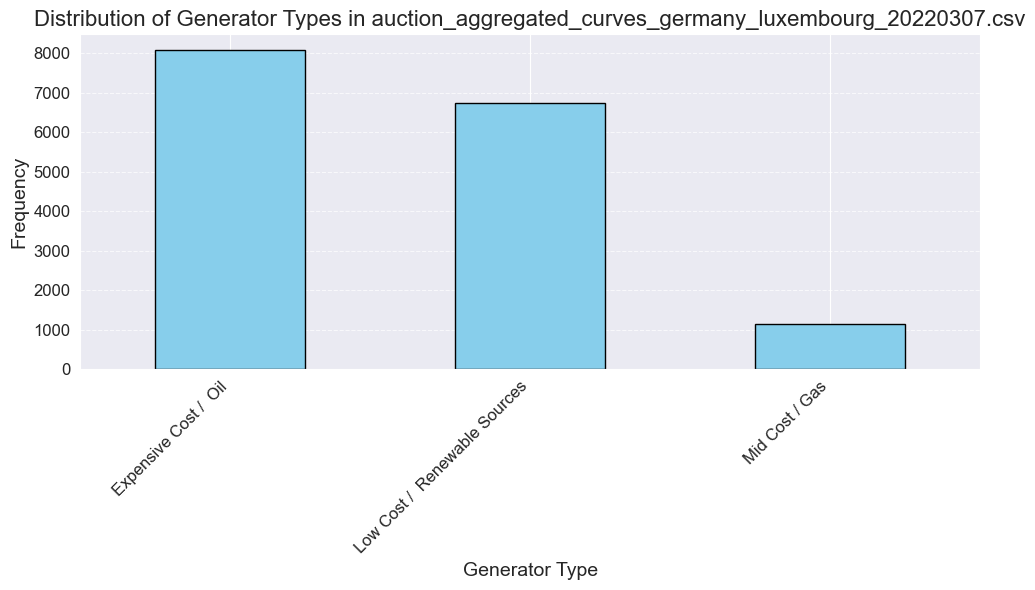

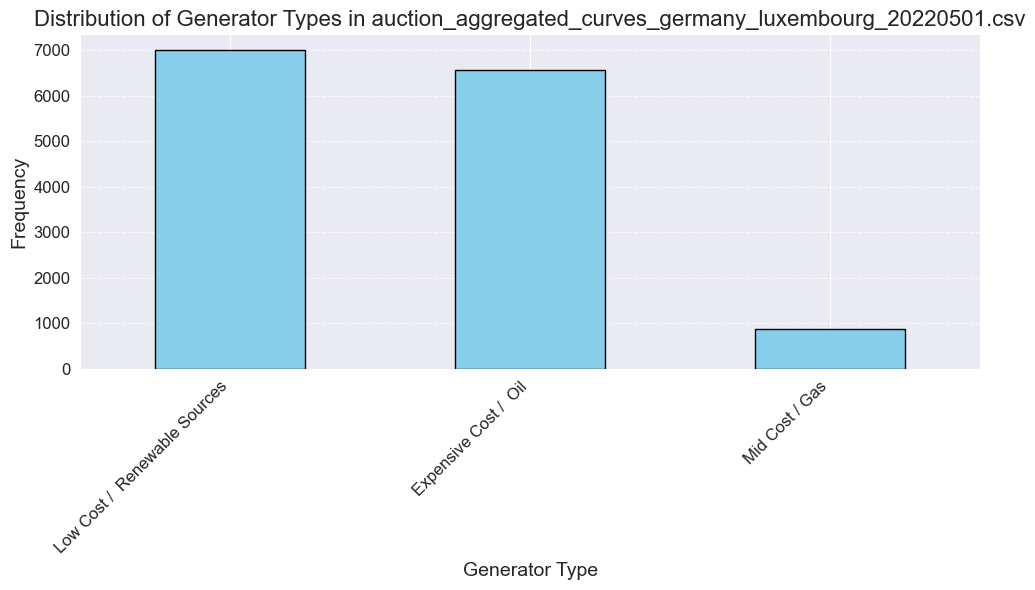

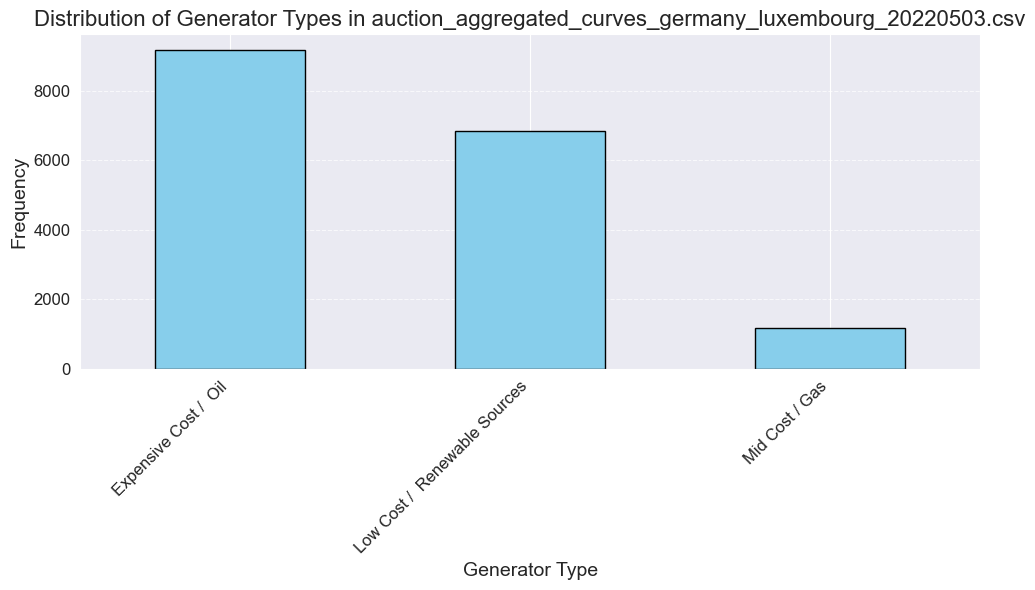

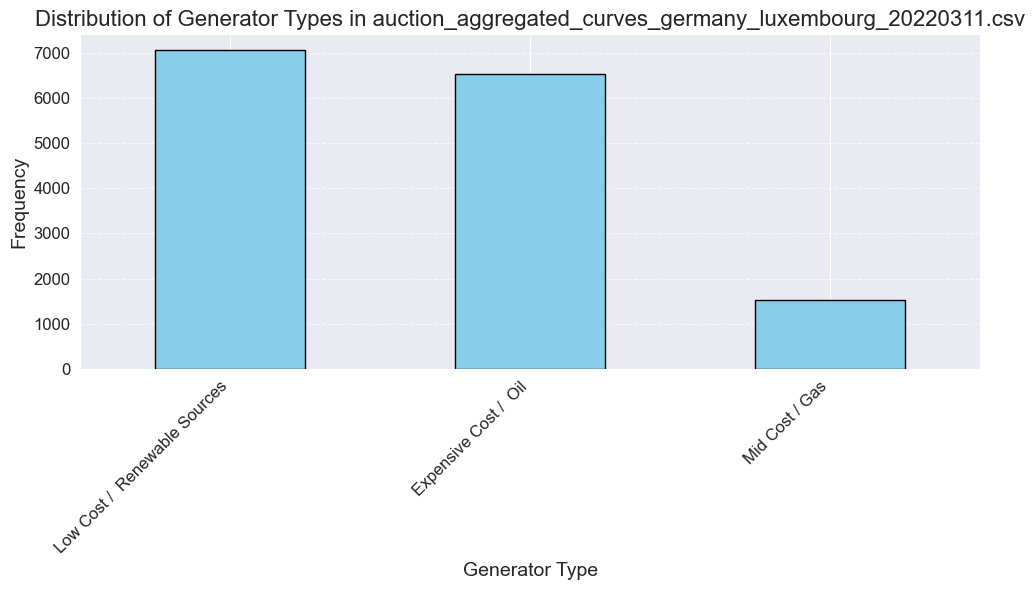

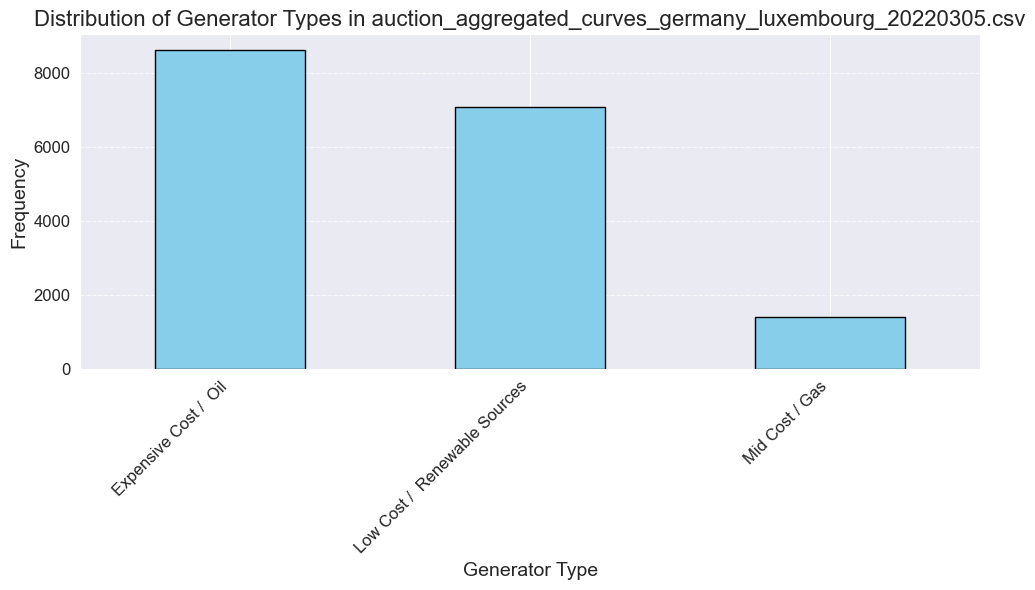

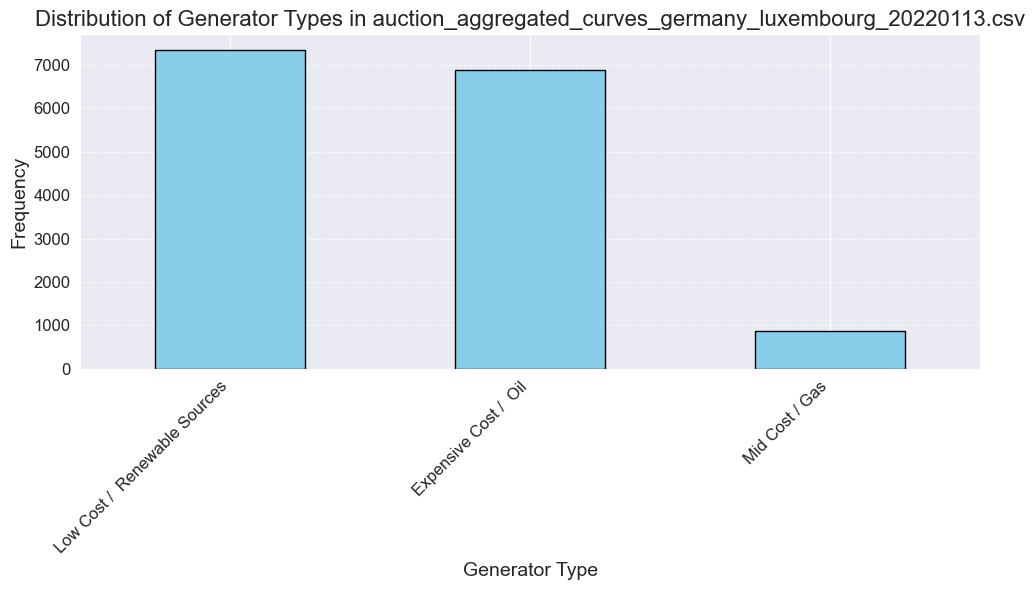

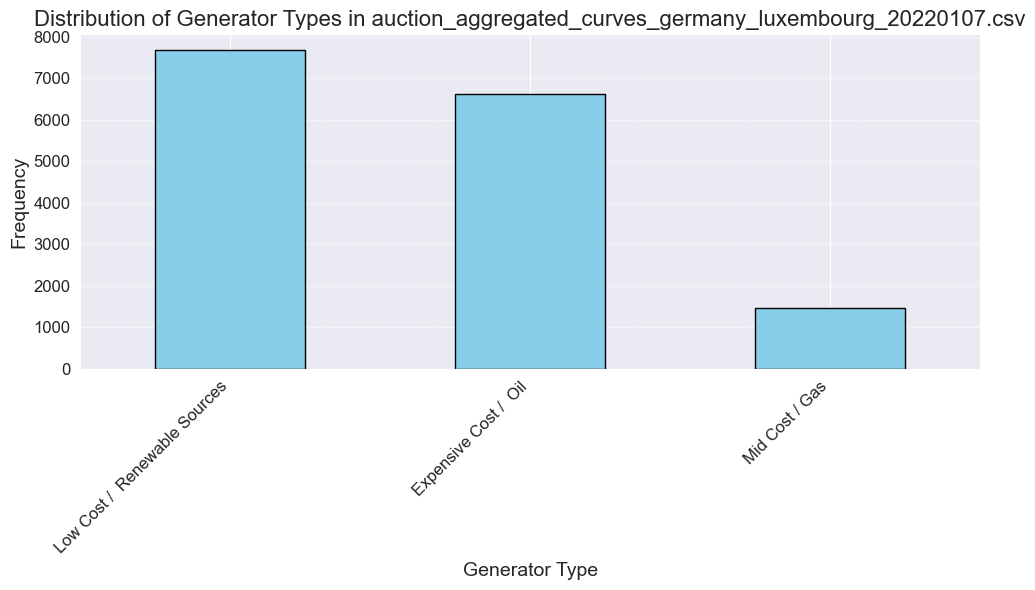

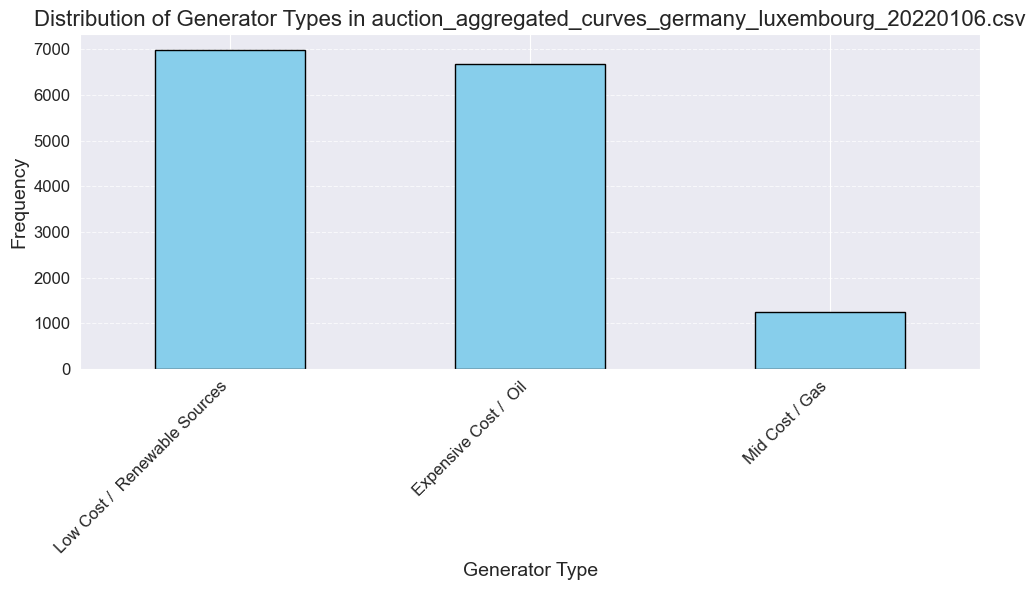

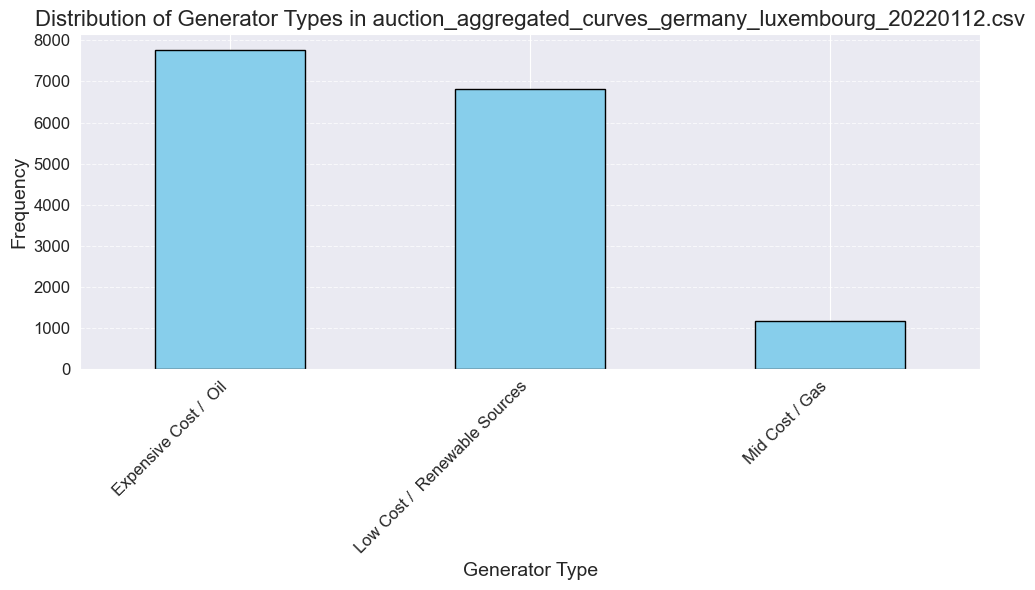

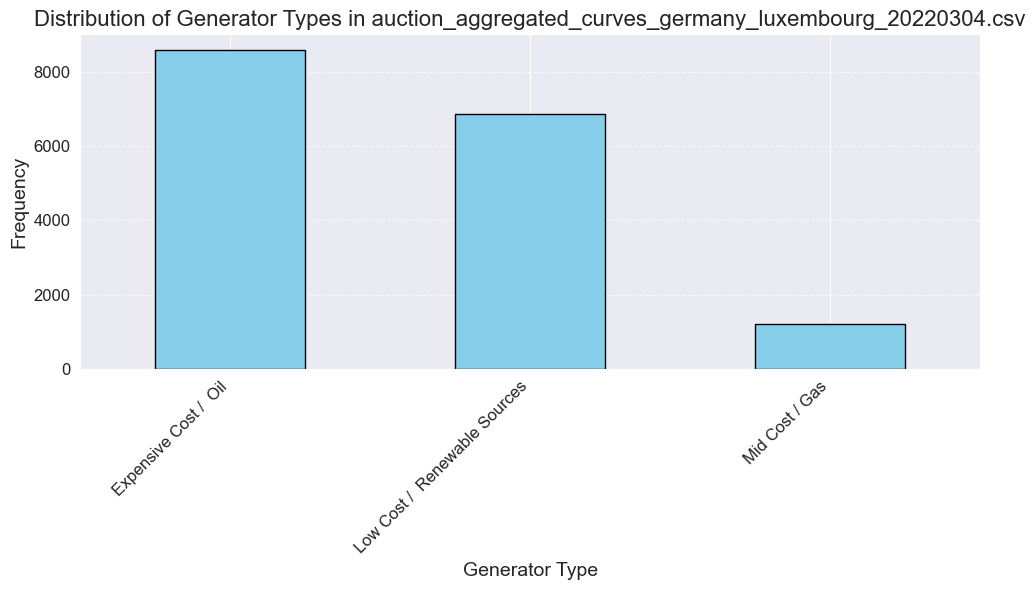

KeyboardInterrupt: 

In [21]:
import os
import pandas as pd


# Function to classify generators based on the Price column
def classify_generator(price):
    if price < 41:
        return 'Low Cost /  Renewable Sources'
    elif 41 <= price <= 85:
        return 'Mid Cost / Gas'
    elif price >= 162:
        return 'Expensive Cost /  Oil'

# Function to plot a histogram of the Generator_Type column
def plot_generator_classification_histogram(data, filename):
    plt.figure(figsize=(10, 6))
    data['Generator_Type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Generator Types in {filename}', fontsize=16)
    plt.xlabel('Generator Type', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Folder containing the CSV files
folder_path = '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves'

# Process each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        data = pd.read_csv(file_path, header=1)
        data.columns = ['Date', 'Week', 'Week_Day', 'Hour', 'Price', 'Volume', 'Sale_Purchase']
        data = data.dropna(subset=['Price'])
        data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
        data['Generator_Type'] = data['Price'].apply(classify_generator)
        plot_generator_classification_histogram(data, filename)


In [22]:
#seasonal trends
import pandas as pd

# Load the data files
files = [
    '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves/auction_aggregated_curves_germany_luxembourg_20220101.csv',
    '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves/auction_aggregated_curves_germany_luxembourg_20220201.csv',
    '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves/auction_aggregated_curves_germany_luxembourg_20220301.csv',
    '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves/auction_aggregated_curves_germany_luxembourg_20220401.csv',
    '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves/auction_aggregated_curves_germany_luxembourg_20220501.csv', '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves/auction_aggregated_curves_germany_luxembourg_20220131.csv',
    '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves/auction_aggregated_curves_germany_luxembourg_20220228.csv',
    '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves/auction_aggregated_curves_germany_luxembourg_20220331.csv','/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves/auction_aggregated_curves_germany_luxembourg_20220430.csv'    
]

data_frames = [pd.read_csv(file) for file in files]

# Combine all data into one DataFrame
data = pd.concat(data_frames, ignore_index=True)

# Display the first few rows of the combined data
data.head()


# 31/12/2021 13:00:13 PM : Aggregated Curves - Spot Market Auction - germany_luxembourg  \
0                                      Sale/Purchase                                        
1                                               Sell                                        
2                                               Sell                                        
3                                               Sell                                        
4                                               Sell                                        

  # 31/01/2022 13:01:56 PM : Aggregated Curves - Spot Market Auction - germany_luxembourg  \
0                                                NaN                                        
1                                                NaN                                        
2                                                NaN                                        
3                                                NaN                                        
4                                                NaN                                        

  # 28/02/2022 12:59:48 PM : Aggregated Curves - Spot Market Auction - germany_luxembourg  \
0                                                NaN                                        
1                                                NaN                                        
2                                                NaN                                        
3                                                NaN                                        
4                                                NaN                                        

  # 31/03/2022 13:19:39 PM : Aggregated Curves - Spot Market Auction - germany_luxembourg  \
0                                                NaN                                        
1                                                NaN                                        
2                                                NaN                                        
3                                                NaN                                        
4                                                NaN                                        

  # 30/04/2022 12:59:07 PM : Aggregated Curves - Spot Market Auction - germany_luxembourg  \
0                                                NaN                                        
1                                                NaN                                        
2                                                NaN                                        
3                                                NaN                                        
4                                                NaN                                        

  # 30/01/2022 12:59:31 PM : Aggregated Curves - Spot Market Auction - germany_luxembourg  \
0                                                NaN                                        
1                                                NaN                                        
2                                                NaN                                        
3                                                NaN                                        
4                                                NaN                                        

  # 27/02/2022 12:59:46 PM : Aggregated Curves - Spot Market Auction - germany_luxembourg  \
0                                                NaN                                        
1                                                NaN                                        
2                                                NaN                                        
3                                                NaN                                        
4                                                NaN                                        

  # 30/03/2022 12:59:37 PM : Aggregated Curves - Spot Market Auction - germany_luxembourg

In [23]:
# Function to read first few lines of each file to inspect structure
def read_first_lines(file_path, num_lines=5):
    with open(file_path, 'r') as file:
        lines = [file.readline() for _ in range(num_lines)]
    return lines

# Read and display the first few lines of each file
file_samples = [read_first_lines(file) for file in files]

file_samples


[['# 31/12/2021 13:00:13 PM : Aggregated Curves - Spot Market Auction - germany_luxembourg\n',
  'Date,Week,Week Day,Hour,Price,Volume,Sale/Purchase\n',
  '01/01/2022,52,6,1,-500.00,184.4,Sell\n',
  '01/01/2022,52,6,1,-500.00,15907.6,Sell\n',
  '01/01/2022,52,6,1,-499.90,15908.2,Sell\n'],
 ['# 31/01/2022 13:01:56 PM : Aggregated Curves - Spot Market Auction - germany_luxembourg\n',
  'Date,Week,Week Day,Hour,Price,Volume,Sale/Purchase\n',
  '01/02/2022,5,2,1,-500.00,3437.2,Sell\n',
  '01/02/2022,5,2,1,-500.00,13284.4,Sell\n',
  '01/02/2022,5,2,1,-499.90,13284.4,Sell\n'],
 ['# 28/02/2022 12:59:48 PM : Aggregated Curves - Spot Market Auction - germany_luxembourg\n',
  'Date,Week,Week Day,Hour,Price,Volume,Sale/Purchase\n',
  '01/03/2022,9,2,1,-500.00,1409.5,Sell\n',
  '01/03/2022,9,2,1,-500.00,10973.6,Sell\n',
  '01/03/2022,9,2,1,-499.90,10973.6,Sell\n'],
 ['# 31/03/2022 13:19:39 PM : Aggregated Curves - Spot Market Auction - germany_luxembourg\n',
  'Date,Week,Week Day,Hour,Price,Volume

In [24]:
# Read and combine data from each file, skipping the first line
data_frames = [pd.read_csv(file, skiprows=1) for file in files]

# Combine all data into one DataFrame
combined_data = pd.concat(data_frames, ignore_index=True)

# Display the first few rows of the combined data to verify
combined_data.head()


Date  Week  Week Day  Hour  Price   Volume Sale/Purchase
0  01/01/2022    52         6     1 -500.0    184.4          Sell
1  01/01/2022    52         6     1 -500.0  15907.6          Sell
2  01/01/2022    52         6     1 -499.9  15908.2          Sell
3  01/01/2022    52         6     1 -499.9  16149.6          Sell
4  01/01/2022    52         6     1 -498.0  16160.1          Sell

In [25]:
# Convert the Date column to datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'], format='%d/%m/%Y')

# Extract month and year for better grouping
combined_data['Year'] = combined_data['Date'].dt.year
combined_data['Month'] = combined_data['Date'].dt.month

# Display the processed data
combined_data.head()


Date  Week  Week Day  Hour  Price   Volume Sale/Purchase  Year  Month
0 2022-01-01    52         6     1 -500.0    184.4          Sell  2022      1
1 2022-01-01    52         6     1 -500.0  15907.6          Sell  2022      1
2 2022-01-01    52         6     1 -499.9  15908.2          Sell  2022      1
3 2022-01-01    52         6     1 -499.9  16149.6          Sell  2022      1
4 2022-01-01    52         6     1 -498.0  16160.1          Sell  2022      1

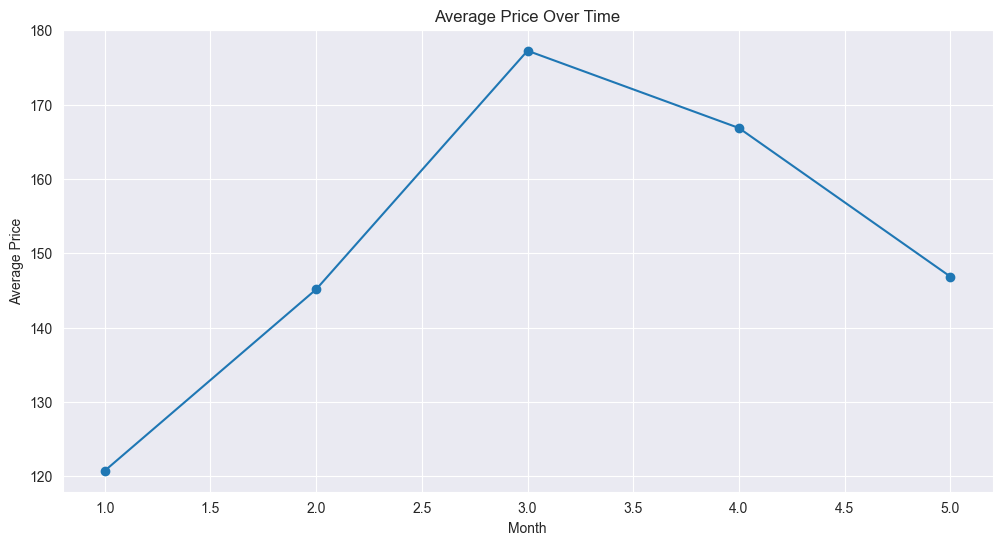

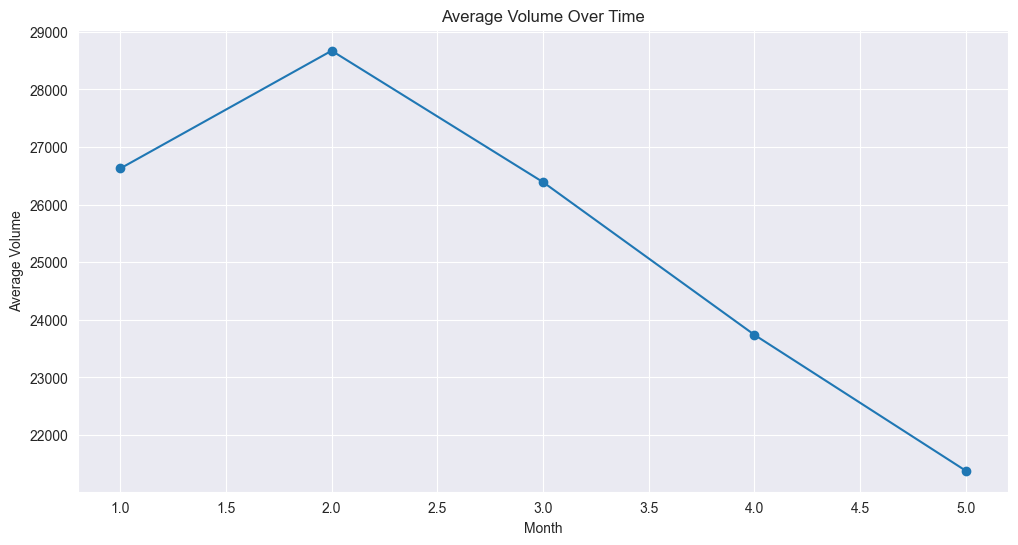

In [26]:
import matplotlib.pyplot as plt

# Group data by month and calculate average price and volume
monthly_data = combined_data.groupby(['Year', 'Month']).agg({'Price': 'mean', 'Volume': 'mean'}).reset_index()

# Plot the average price over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'], monthly_data['Price'], marker='o', linestyle='-')
plt.title('Average Price Over Time')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# Plot the average volume over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'], monthly_data['Volume'], marker='o', linestyle='-')
plt.title('Average Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.grid(True)
plt.show()

# The plots show the average price and volume over time for the first five months of 2022.
# we can observe the following:
# Average Price Over Time: There is a noticeable fluctuation in average prices across the months. Prices seem to vary
# Average Volume Over Time: volume shows variability across the months.
# Increase of the average price for winter season and decrease for spring season
# Decrease of the average Volume for January and February and decrease for the last months

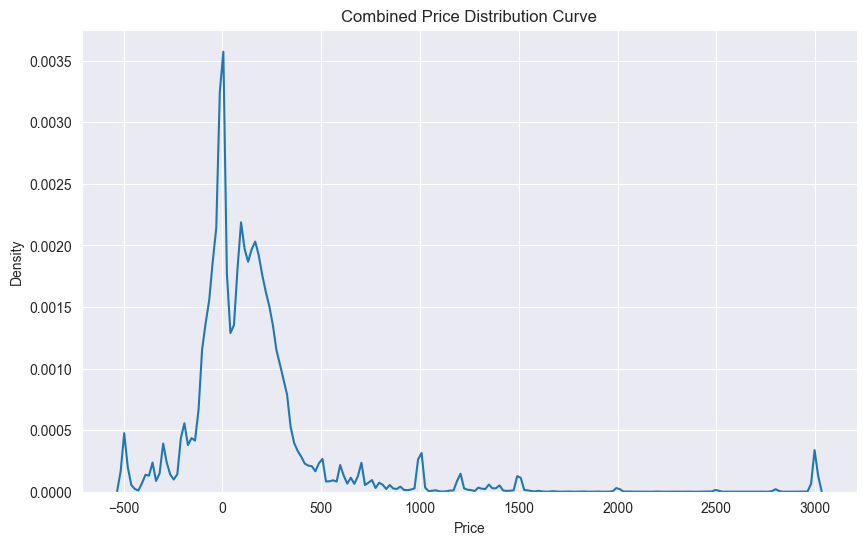

In [27]:
# Distribution curve of the prices
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

# List the CSV files within the  folder
curves_folder = os.path.join('/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/', 'Aggregated curves')
csv_files = [os.path.join(curves_folder, file) for file in os.listdir(curves_folder) if file.endswith('.csv')]

# Initialize an empty list to hold the price data from all files
all_prices = []

# Process each CSV file to extract price data
for file in csv_files:
    try:
        # Read the CSV file
        df = pd.read_csv(file, skiprows=1, delimiter=r'\s{2,}', engine='python')

        # Clean and extract the 'Price' column
        data_rows = [line.strip() for line in open(file, 'r').readlines()[1:] if line.strip() and ',' in line]
        df_cleaned = pd.DataFrame([row.split(',') for row in data_rows], columns=['Date', 'Week', 'Week Day', 'Hour', 'Price', 'Volume', 'Sale/Purchase'])

        # Convert 'Price' column to numeric
        df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')

        # Append the prices to the list
        all_prices.extend(df_cleaned['Price'].dropna().tolist())
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Convert the list of all prices to a DataFrame for plotting
all_prices_df = pd.DataFrame(all_prices, columns=['Price'])

# Setting up the plot
plt.figure(figsize=(10, 6))

# Creating a distribution plot for the aggregated Price data
sns.kdeplot(all_prices_df['Price'], bw_adjust=0.5)

# Adding titles and labels
plt.title('Combined Price Distribution Curve')
plt.xlabel('Price')
plt.ylabel('Density')

# Displaying the plot
plt.show()

# Observation The highest density of prices is concentrated around the more moderate price levels.

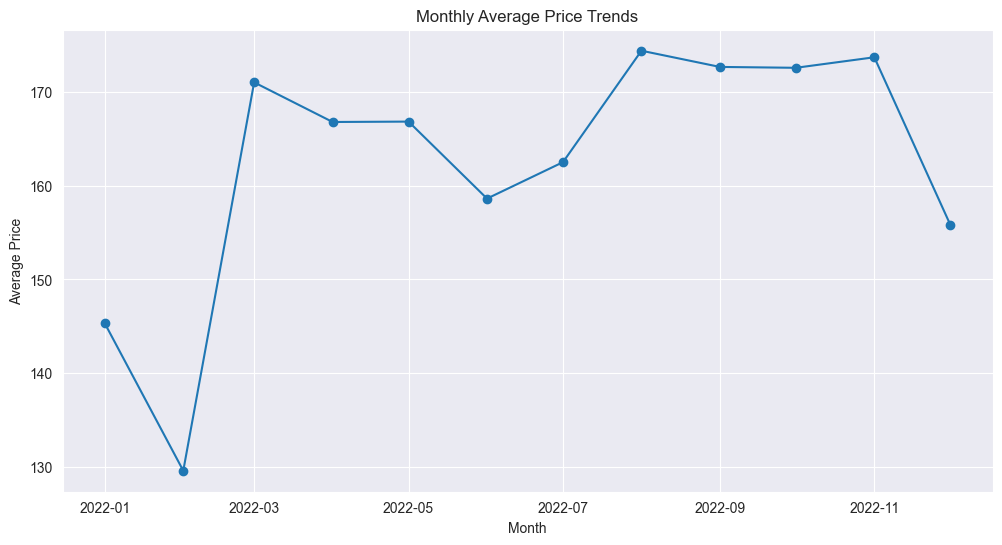

In [28]:
# Combine all the CSV files again to ensure we have the 'Date' column for proper monthly aggregation
all_data = []

for file in csv_files:
    try:
        df = pd.read_csv(file, skiprows=1, delimiter=r'\s{2,}', engine='python')

        data_rows = [line.strip() for line in open(file, 'r').readlines()[1:] if line.strip() and ',' in line]
        df_cleaned = pd.DataFrame([row.split(',') for row in data_rows], columns=['Date', 'Week', 'Week Day', 'Hour', 'Price', 'Volume', 'Sale/Purchase'])

        df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')
        df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

        all_data.append(df_cleaned[['Date', 'Price']])
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Concatenate all the dataframes
combined_df = pd.concat(all_data, ignore_index=True)

# Drop any rows with missing dates or prices
combined_df.dropna(subset=['Date', 'Price'], inplace=True)

# Extract year and month from the Date column
combined_df['YearMonth'] = combined_df['Date'].dt.to_period('M')

# Calculate the average price for each month
monthly_avg_prices = combined_df.groupby('YearMonth')['Price'].mean().reset_index()

# Convert the 'YearMonth' to a datetime object for proper plotting
monthly_avg_prices['YearMonth'] = monthly_avg_prices['YearMonth'].dt.to_timestamp()
plt.figure(figsize=(12, 6))

# Creating a line plot for the monthly average prices
plt.plot(monthly_avg_prices['YearMonth'], monthly_avg_prices['Price'], marker='o')

# Adding titles and labels
plt.title('Monthly Average Price Trends')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)

# Displaying the plot
plt.show()

# Observation 
# There are noticeable fluctuations in average prices from month to month 
# Some months show a significant rise or drop in prices  
# Certain months exhibit higher average prices compared to others

In [29]:
# Calculate the overall average price
overall_avg_price = monthly_avg_prices['Price'].mean()

# Identify months with average prices significantly higher than the overall average
higher_than_avg = monthly_avg_prices[monthly_avg_prices['Price'] > overall_avg_price]

# Display the months with higher than average prices
higher_than_avg

#Observation 
# The months with average prices significantly higher than the overall average are:

#March 2022: Average Price = 171.04
#April 2022: Average Price = 166.81
#May 2022: Average Price = 166.85


YearMonth       Price
2  2022-03-01  171.036078
3  2022-04-01  166.805702
4  2022-05-01  166.847418
6  2022-07-01  162.515956
7  2022-08-01  174.411645
8  2022-09-01  172.681704
9  2022-10-01  172.589221
10 2022-11-01  173.712801